# Техническое задание

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# 10 неделя

## `Bert` (эксперимент Николая Гаврилкова на  основе статьи `Habr`)

[Классификация текста с использованием моделей трансформеров](https://habr.com/ru/articles/655517/)

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.9 MB/s eta 0:00:00


### Датафрейм

#### Загрузка

In [ ]:
# Загрузка датафрейма
import pandas as pd
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999
df_good_pred = pd.read_csv('/content/drive/MyDrive/media108.ru/Датафреймы/df_good_pred.csv')
df_good_pred.shape

(6921, 35)

#### Столбцы

In [ ]:
df_good_pred.columns

Index(['Name', 'Имя файла', 'whisper', 'Статус', 'Тип', 'Дата и время',
       'Номер абонента', 'Длительность звонка', 'Сотрудник', 'ID посетителя',
       'Номер обращения', 'target', 'targetall', 'klass', 'pred', 'pred_',
       'Теги', 'Рекламная кампания', 'Сайт', 'Номер сотрудника', 'Трансфер',
       'Внутренний звонок', 'Сценарий', 'Операции',
       'Идентификатор сессии звонка', 'Регион номера абонента',
       'Страна номера абонента', 'Первая рекламная кампания',
       'Количество посещений', 'Тип посетителя', 'Тип устройства',
       'Длительность разговора', 'Длительность постобработки',
       'Чистая длительность разговора', 'Полная длительность ожидания'],
      dtype='object')

In [ ]:
df_good_pred['Name'].head()

0    Павелецкая сити
1    Павелецкая сити
2    Павелецкая сити
3    Павелецкая сити
4          Headliner
Name: Name, dtype: object

In [ ]:
df_good_pred['Имя файла'].head()

0    2023-07-18_13-51-59.127269_from_78005055934_to_74955141111_session_3098031427_talk.mp3
1    2023-07-11_18-13-13.999706_from_79274147009_to_74955141111_session_3081712381_talk.mp3
2    2023-06-27_15-04-43.293132_from_79036175926_to_74955141111_session_3051069194_talk.mp3
3    2023-06-19_20-04-39.492518_from_79274574090_to_74955141111_session_3033747752_talk.mp3
4    2023-07-19_17-12-58.258412_from_79991345109_to_74959339902_session_3099072526_talk.mp3
Name: Имя файла, dtype: object

In [ ]:
df_good_pred['whisper'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 безотв

In [ ]:
df_good_pred['Статус'].head()

0    Принятый
1    Принятый
2    Принятый
3    Принятый
4    Принятый
Name: Статус, dtype: object

In [ ]:
df_good_pred['Тип'].head()

0    Динамический коллтрекинг
1    Динамический коллтрекинг
2                   Аналитика
3    Динамический коллтрекинг
4    Динамический коллтрекинг
Name: Тип, dtype: object

In [ ]:
df_good_pred['Дата и время'].head()

0    2023-07-18 13:51:58
1    2023-07-11 18:13:13
2    2023-06-27 15:04:42
3    2023-06-19 20:04:38
4    2023-07-19 17:12:54
Name: Дата и время, dtype: object

In [ ]:
df_good_pred['Номер абонента'].head()

0    78005055934
1    79274147009
2    79036175926
3    79274574090
4    79991345109
Name: Номер абонента, dtype: int64

In [ ]:
df_good_pred['Длительность звонка'].head()

0      2
1      4
2     22
3      4
4    399
Name: Длительность звонка, dtype: int64

In [ ]:
df_good_pred['Сотрудник'].head()

0    74955141111.0
1    74955141111.0
2    74955141111.0
3    74955141111.0
4          Кортрос
Name: Сотрудник, dtype: object

In [ ]:
df_good_pred['ID посетителя'].head()

0    70.464352
1    70.987218
2     0.000000
3    73.719317
4    74.341479
Name: ID посетителя, dtype: float64

In [ ]:
df_good_pred['Номер обращения'].head()

0    2
1    2
2    1
3    1
4    2
Name: Номер обращения, dtype: int64

In [ ]:
df_good_pred['target'].head()

0    0
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [ ]:
df_good_pred['targetall'].head()

0    0
1    0
2    0
3    0
4    1
Name: targetall, dtype: int64

In [ ]:
df_good_pred['klass'].head()

0    0
1    0
2    0
3    0
4    2
Name: klass, dtype: int64

In [ ]:
df_good_pred['pred'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: pred, dtype: float64

In [ ]:
df_good_pred['pred_'].head()

0    0.006376
1    0.006260
2    0.130041
3    0.004696
4    0.795126
Name: pred_, dtype: float64

In [ ]:
df_good_pred['Теги'].head()

0                        Нецелевой контакт
1                        Нецелевой контакт
2                        Нецелевой контакт
3                        Нецелевой контакт
4    Первичный целевой - 3 очередь - 1-ком
Name: Теги, dtype: object

In [ ]:
df_good_pred['Рекламная кампания'].head()

0    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
1    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
2    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
3    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
4                                        Поисковое продвижение
Name: Рекламная кампания, dtype: object

In [ ]:
df_good_pred['Сайт'].head()

0    pavcity.turbo.site
1    pavcity.turbo.site
2    pavcity.turbo.site
3    pavcity.turbo.site
4         head-liner.ru
Name: Сайт, dtype: object

In [ ]:
df_good_pred['Номер сотрудника'].head()

0    74955141111
1    74955141111
2    74955141111
3    74955141111
4    74959339902
Name: Номер сотрудника, dtype: object

In [ ]:
df_good_pred['Трансфер'].head()

0    Нет
1    Нет
2    Нет
3    Нет
4    Нет
Name: Трансфер, dtype: object

In [ ]:
df_good_pred['Внутренний звонок'].head()

0    Нет
1    Нет
2    Нет
3    Нет
4    Нет
Name: Внутренний звонок, dtype: object

In [ ]:
df_good_pred['Сценарий'].head()

0                 74955141111
1                 74955141111
2                 74955141111
3                 74955141111
4    .Последовательный обзвон
Name: Сценарий, dtype: object

In [ ]:
df_good_pred['Операции'].head()

0                              Переадресация
1                              Переадресация
2                              Переадресация
3                              Переадресация
4    Переадресация на последнего менеджера 1
Name: Операции, dtype: object

In [ ]:
df_good_pred['Идентификатор сессии звонка'].head()

0    3098031427
1    3081712381
2    3051069194
3    3033747752
4    3099072526
Name: Идентификатор сессии звонка, dtype: int64

In [ ]:
df_good_pred['Регион номера абонента'].head()

0    Российская Федерация 8-800
1          Республика Татарстан
2                     г. Москва
3          Республика Татарстан
4       Республика Башкортостан
Name: Регион номера абонента, dtype: object

In [ ]:
df_good_pred['Страна номера абонента'].head()

0    РФ
1    РФ
2    РФ
3    РФ
4    РФ
Name: Страна номера абонента, dtype: object

In [ ]:
df_good_pred['Первая рекламная кампания'].head()

0    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
1    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
2                            Посетители без рекламной кампании
3    Artics | Павелецкая Сити | direct | Яндекс.Директ (турбо)
4                                        Поисковое продвижение
Name: Первая рекламная кампания, dtype: object

In [ ]:
df_good_pred['Количество посещений'].head()

0    28.0
1     5.0
2     NaN
3     1.0
4       1
Name: Количество посещений, dtype: object

In [ ]:
df_good_pred['Тип посетителя'].head()

0    Вернувшийся
1    Вернувшийся
2    Не заполнен
3          Новый
4          Новый
Name: Тип посетителя, dtype: object

In [ ]:
df_good_pred['Тип устройства'].head()

0    Смартфон
1    Смартфон
2      Прочее
3    Смартфон
4          ПК
Name: Тип устройства, dtype: object

In [ ]:
df_good_pred['Длительность разговора'].head()

0      1
1      3
2     20
3      3
4    394
Name: Длительность разговора, dtype: int64

In [ ]:
df_good_pred['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
df_good_pred['Чистая длительность разговора'].head()

0      1
1      3
2     20
3      2
4    394
Name: Чистая длительность разговора, dtype: int64

In [ ]:
df_good_pred['Полная длительность ожидания'].head()

0    00:00:01
1    00:00:01
2    00:00:02
3    00:00:02
4    00:00:05
Name: Полная длительность ожидания, dtype: object

#### Типы данных

In [ ]:
df_good_pred.dtypes

Name                              object
Имя файла                         object
whisper                           object
Статус                            object
Тип                               object
Дата и время                      object
Номер абонента                     int64
Длительность звонка                int64
Сотрудник                         object
ID посетителя                    float64
Номер обращения                    int64
target                             int64
targetall                          int64
klass                              int64
pred                             float64
pred_                            float64
Теги                              object
Рекламная кампания                object
Сайт                              object
Номер сотрудника                  object
Трансфер                          object
Внутренний звонок                 object
Сценарий                          object
Операции                          object
Идентификатор се

#### Количество записей

In [ ]:
df_good_pred.count()

Name                             6921
Имя файла                        6921
whisper                          6921
Статус                           6921
Тип                              6921
Дата и время                     6921
Номер абонента                   6921
Длительность звонка              6921
Сотрудник                        6920
ID посетителя                    6921
Номер обращения                  6921
target                           6921
targetall                        6921
klass                            6921
pred                             6921
pred_                            6921
Теги                             6921
Рекламная кампания               6921
Сайт                             6921
Номер сотрудника                 6921
Трансфер                         6921
Внутренний звонок                6921
Сценарий                         6921
Операции                         6921
Идентификатор сессии звонка      6921
Регион номера абонента           6921
Страна номер

#### `classification_report`

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_good_pred['target'], df_good_pred['pred']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4648
           1       0.90      0.95      0.92      2273

    accuracy                           0.95      6921
   macro avg       0.94      0.95      0.94      6921
weighted avg       0.95      0.95      0.95      6921



#### Тестовые данные

In [ ]:
from sklearn.model_selection import train_test_split

tr_df, val_df     = train_test_split(df_good_pred[['target','pred','pred_']], test_size=0.2,  random_state=42, stratify=df_good_pred['target'])
train_df, test_df = train_test_split(tr_df,                                   test_size=0.25, random_state=42, stratify=tr_df['target'])
train_df.shape[0], val_df.shape[0], test_df.shape[0]

(4152, 1385, 1384)

In [ ]:
# Обучающая выборка
print(classification_report(train_df['target'], train_df['pred']))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2788
           1       0.89      0.95      0.92      1364

    accuracy                           0.95      4152
   macro avg       0.93      0.95      0.94      4152
weighted avg       0.95      0.95      0.95      4152



In [ ]:
# Проверочная выборка
print(classification_report(val_df['target'], val_df['pred']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       930
           1       0.92      0.94      0.93       455

    accuracy                           0.95      1385
   macro avg       0.94      0.95      0.95      1385
weighted avg       0.95      0.95      0.95      1385



In [ ]:
# Тестовая выборка
print(classification_report(test_df['target'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       930
           1       0.91      0.94      0.92       454

    accuracy                           0.95      1384
   macro avg       0.94      0.95      0.94      1384
weighted avg       0.95      0.95      0.95      1384



### Данные

In [ ]:
df = df_good_pred[['whisper','target']].copy()
df.shape

(6921, 2)

In [ ]:
df.head()

,whisper,target
0,безответа,0
1,здравствуйте,0
2,здравствуйте вы позвонили в компанию эмргрупп пожалуйста дождитесь ответа нашего специалиста обращаем ваше внимание что в целях улучшения качества обслуживания клиентов все разговоры записываются продолжая разговор вы соглашаетесь на обработку ваших персональных данных,0
3,здравствуйте,0
4,здравствуйте вы позвонили в группу компании картрофт благодарим вас за звонок пожалуйста дождитесь ответа оператора группа компании картрофт меня зовут елена здравствуйте здравствуйте меня интересует спедлайнер я вас сейчас соединю с одним упрадашником он жестко консультирует как вас зовут ирина александровна благодарю оставайтесь на линии здравствуйте меня зовут дарья какие вопросы по проекту ходланд слушаю вас добрый день смотрите интересует одна квартира 41 квадрат за 20 пейсов у нас есть вариант какая там площадь 4099 помоему да есть такая квартира есть интересующийся покупатель на подобную квартиру но мы не укладываемся под цену совсем немного причем хотел у вас узнать у вас вообще возможно ли есть какиенибудь сады цены еще чтонибудь чтобы я ему смог это все объяснить я скажу так что это у нас квартира от инвестора проекта и цена финальная скидки на эту квартиру не будет а сколько не хватает примерная цена 18519 они готовы уже на эту цену к сожалению у нас просто это не наш б...,1


In [ ]:
from sklearn.model_selection import train_test_split

tr_df, val_df     = train_test_split(df,    test_size=0.2,  random_state=42, stratify=df['target'])
train_df, test_df = train_test_split(tr_df, test_size=0.25, random_state=42, stratify=tr_df['target'])
train_df.shape[0], val_df.shape[0], test_df.shape[0]

(4152, 1385, 1384)

In [ ]:
import torch
from   torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler
from   transformers     import BertTokenizer

train_text       = train_df['whisper'].astype('str')
train_labels     = train_df['target']
val_text         = val_df  ['whisper'].astype('str')
val_labels       = val_df  ['target']
test_text        = test_df ['whisper'].astype('str')
test_labels      = test_df ['target']

tokenizer        = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

tokens_train     = tokenizer.batch_encode_plus(train_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_val       = tokenizer.batch_encode_plus(val_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_test      = tokenizer.batch_encode_plus(test_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

train_seq        = torch.tensor(tokens_train['input_ids'])
train_mask       = torch.tensor(tokens_train['attention_mask'])
train_y          = torch.tensor(train_labels.values)

val_seq          = torch.tensor(tokens_val['input_ids'])
val_mask         = torch.tensor(tokens_val['attention_mask'])
val_y            = torch.tensor(val_labels.values)

test_seq         = torch.tensor(tokens_test['input_ids'])
test_mask        = torch.tensor(tokens_test['attention_mask'])
test_y           = torch.tensor(test_labels.values)

batch_size       = 8

train_data       = TensorDataset(train_seq, train_mask, train_y)
train_sampler    = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

val_data         = TensorDataset(val_seq, val_mask, val_y)
val_sampler      = SequentialSampler(val_data)
val_dataloader   = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)

<Axes: >

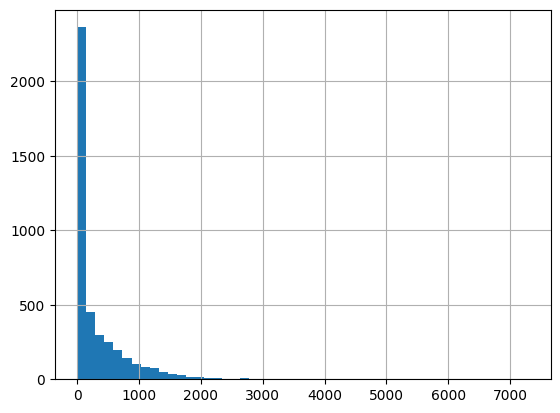

In [ ]:
seq_len = [len(str(i).split()) for i in train_text]
pd.Series(seq_len).hist(bins = 50)

### Модель

In [ ]:
from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
for param in bert.parameters():
  param.requires_grad = False

In [ ]:
import torch.nn as nn

class BERT_Arch(nn.Module):

  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

In [ ]:
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)

In [ ]:
import numpy as np
from   sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
print(class_weights)

[0.7446198  1.52199413]


In [ ]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=1e-3)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm
def train():
  model.train()
  total_loss, total_accuracy = 0, 0
  total_preds = []

  for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
    batch = [r.to(device) for r in batch]
    sent_id,mask,labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds = preds.detach().cpu().numpy()
    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [ ]:
def evaluate():
  model.eval()

  total_loss, total_accuracy = 0,0
  total_preds = []

  for step, batch in tqdm(enumerate(val_dataloader), total = len(val_dataloader)):
    batch = [t.to(device) for t in batch]
    sent_id, mask, labels = batch

    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds, labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)

  avg_loss = total_loss / len(val_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [ ]:
bert.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
epochs          = 25
best_valid_loss = float('inf')
best_loss       = float('inf')

train_losses    = []
valid_losses    = []

for epoch in range(epochs):
  print('\n Epoch{:} / {:}'.format(epoch+1, epochs))

  train_loss, _ = train()
  valid_loss, _ = evaluate()

  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')
  if valid_loss == best_valid_loss:
    if train_loss < best_loss:
      best_loss = train_loss
      torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  print(f'\nTraining loss: {train_loss:.3f}')
  print(f'Validation loss: {valid_loss:.3f}')


 Epoch1 / 25


100%|██████████| 174/174 [00:43<00:00,  4.01it/s]



Training loss: 0.373
Validation loss: 0.312

 Epoch2 / 25


100%|██████████| 174/174 [00:45<00:00,  3.84it/s]



Training loss: 0.345
Validation loss: 0.304

 Epoch3 / 25


100%|██████████| 174/174 [00:44<00:00,  3.88it/s]



Training loss: 0.337
Validation loss: 0.310

 Epoch4 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.325
Validation loss: 0.298

 Epoch5 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.331
Validation loss: 0.311

 Epoch6 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.324
Validation loss: 0.288

 Epoch7 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.320
Validation loss: 0.285

 Epoch8 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.316
Validation loss: 0.299

 Epoch9 / 25


100%|██████████| 174/174 [00:45<00:00,  3.87it/s]



Training loss: 0.311
Validation loss: 0.365

 Epoch10 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.316
Validation loss: 0.287

 Epoch11 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.307
Validation loss: 0.279

 Epoch12 / 25


100%|██████████| 174/174 [00:44<00:00,  3.88it/s]



Training loss: 0.304
Validation loss: 0.284

 Epoch13 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.307
Validation loss: 0.289

 Epoch14 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.301
Validation loss: 0.301

 Epoch15 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.302
Validation loss: 0.277

 Epoch16 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.298
Validation loss: 0.283

 Epoch17 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.303
Validation loss: 0.289

 Epoch18 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.294
Validation loss: 0.304

 Epoch19 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.291
Validation loss: 0.305

 Epoch20 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.296
Validation loss: 0.282

 Epoch21 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.293
Validation loss: 0.295

 Epoch22 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.294
Validation loss: 0.295

 Epoch23 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.298
Validation loss: 0.294

 Epoch24 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.296
Validation loss: 0.280

 Epoch25 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]


Training loss: 0.293
Validation loss: 0.296


### Тест

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

<All keys matched successfully>

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq  = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)

predictions = []

for num, elem in enumerate(list_seq):
  with torch.no_grad():
    preds = model(elem.to(device), list_mask[num].to(device))
    predictions.append(preds.detach().cpu().numpy())

In [ ]:
flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['pred_'] = flat_preds

In [ ]:
# Порог 0.95
from sklearn.metrics import classification_report
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.95 else 0)
print(classification_report(test_df['target'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       930
           1       0.80      0.85      0.83       454

    accuracy                           0.88      1384
   macro avg       0.87      0.88      0.87      1384
weighted avg       0.89      0.88      0.88      1384



In [ ]:
test_df.target.value_counts()

0    930
1    454
Name: target, dtype: int64

In [ ]:
test_df.pred.value_counts()

0    903
1    481
Name: pred, dtype: int64

In [ ]:
display(test_df[['target','pred','pred_']])

,target,pred,pred_
4933,0,0,0.268335
2326,0,0,0.724599
1452,0,0,0.573341
5338,0,0,0.310974
4771,1,1,0.998673
...,...,...,...
574,0,0,0.550224
1484,0,0,0.881428
4419,1,1,0.993953
938,0,0,0.547062


In [ ]:
# Порог 0.93
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.93 else 0)
print(classification_report(test_df['target'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       930
           1       0.77      0.93      0.84       454

    accuracy                           0.89      1384
   macro avg       0.87      0.90      0.88      1384
weighted avg       0.90      0.89      0.89      1384



In [ ]:
test_df.pred.value_counts()

0    834
1    550
Name: pred, dtype: int64

In [ ]:
display(test_df[['target','pred','pred_']])

,target,pred,pred_
4933,0,0,0.268335
2326,0,0,0.724599
1452,0,0,0.573341
5338,0,0,0.310974
4771,1,1,0.998673
...,...,...,...
574,0,0,0.550224
1484,0,0,0.881428
4419,1,1,0.993953
938,0,0,0.547062


### Тест (reloaded)

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
import torch.nn as nn

class BERT_Arch(nn.Module):

  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

In [ ]:
import torch
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

<All keys matched successfully>

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
# Загрузка датафрейма
import pandas as pd
df_good_pred = pd.read_csv('/content/drive/MyDrive/media108.ru/Датафреймы/df_good_pred.csv')
df_good_pred.shape

(6921, 35)

In [ ]:
df = df_good_pred[['whisper','target']].copy()

In [ ]:
from sklearn.model_selection import train_test_split
tr_df, val_df     = train_test_split(df,    test_size=0.2,  random_state=42, stratify=df['target'])
train_df, test_df = train_test_split(tr_df, test_size=0.25, random_state=42, stratify=tr_df['target'])

In [ ]:
test_text   = test_df['whisper'].astype('str')

tokens_test = tokenizer.batch_encode_plus(test_text.values,
                                          max_length=512,
                                          padding='max_length',
                                          truncation=True)

test_seq    = torch.tensor(tokens_test['input_ids'])
test_mask   = torch.tensor(tokens_test['attention_mask'])

In [ ]:
# Из-за нехватки видеопамяти отправляем тестовые данные на распознавание по частям
import numpy as np
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq  = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)

predictions = []

for num, elem in enumerate(list_seq):
  with torch.no_grad():
    preds = model(elem.to(device), list_mask[num].to(device))
    predictions.append(preds.detach().cpu().numpy())

In [ ]:
flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['pred_'] = flat_preds

In [ ]:
# Порог 0.95
from sklearn.metrics import classification_report
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.95 else 0)
print(classification_report(test_df['target'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       930
           1       0.79      0.86      0.82       454

    accuracy                           0.88      1384
   macro avg       0.86      0.87      0.87      1384
weighted avg       0.88      0.88      0.88      1384



In [ ]:
test_df.target.value_counts()

0    930
1    454
Name: target, dtype: int64

In [ ]:
test_df.pred.value_counts()

0    886
1    498
Name: pred, dtype: int64

In [ ]:
display(test_df[['target','pred','pred_']])

,target,pred,pred_
4933,0,0,0.287985
2326,0,0,0.752144
1452,0,0,0.550179
5338,0,0,0.374748
4771,1,1,0.998639
...,...,...,...
574,0,0,0.618015
1484,0,0,0.877937
4419,1,1,0.995334
938,0,0,0.589571


In [ ]:
# Порог 0.93
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.93 else 0)
print(classification_report(test_df['target'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91       930
           1       0.76      0.94      0.84       454

    accuracy                           0.88      1384
   macro avg       0.86      0.89      0.87      1384
weighted avg       0.90      0.88      0.88      1384



In [ ]:
test_df.pred.value_counts()

0    823
1    561
Name: pred, dtype: int64

In [ ]:
display(test_df[['target','pred','pred_']])

,target,pred,pred_
4933,0,0,0.287985
2326,0,0,0.752144
1452,0,0,0.550179
5338,0,0,0.374748
4771,1,1,0.998639
...,...,...,...
574,0,0,0.618015
1484,0,0,0.877937
4419,1,1,0.995334
938,0,0,0.589571


### Тест (prod)

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModel, BertTokenizer
bert      = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
import torch.nn as nn
class BERT_Arch(nn.Module):
  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)
  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

In [ ]:
import torch
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

<All keys matched successfully>

In [ ]:
import pandas as pd
df_good_pred = pd.read_csv('/content/drive/MyDrive/media108.ru/Датафреймы/df_good_pred.csv')
df_good_pred.shape

(6921, 35)

In [ ]:
test_text   = df_good_pred['whisper'].head().astype('str')
tokens_test = tokenizer.batch_encode_plus(test_text.values,
                                          max_length=512,
                                          padding='max_length',
                                          truncation=True)
test_seq    = torch.tensor(tokens_test['input_ids'])
test_mask   = torch.tensor(tokens_test['attention_mask'])

In [ ]:
preds = model(test_seq.to(device), test_mask.to(device))
preds.detach().cpu().numpy()

array([[-1.3824678e-03, -6.5846081e+00],
       [-2.3541064e-04, -8.3544378e+00],
       [-4.0160041e-02, -3.2348969e+00],
       [-2.9356938e-04, -8.1336336e+00],
       [-1.7020606e+00, -2.0126888e-01]], dtype=float32)

In [ ]:
import numpy as np
flat_preds = [item[1] for item in preds.detach().cpu().numpy()]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
option = lambda x: 1 if x > 0.95 else 0
np.vectorize(option)(flat_preds)

array([0, 0, 0, 0, 1])

In [ ]:
df_good_pred['target'].head().values

array([0, 0, 0, 0, 1])

In [ ]:
test_text   = df_good_pred['whisper'].tail(1).astype('str')
tokens_test = tokenizer.batch_encode_plus(test_text.values,
                                          max_length=512,
                                          padding='max_length',
                                          truncation=True)
test_seq    = torch.tensor(tokens_test['input_ids'])
test_mask   = torch.tensor(tokens_test['attention_mask'])

In [ ]:
preds = model(test_seq.to(device), test_mask.to(device))
preds.detach().cpu().numpy()

array([[-1.0163386e-03, -6.8920484e+00]], dtype=float32)

In [ ]:
flat_preds = np.append(flat_preds, preds.detach().cpu().numpy()[0,1])
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
option = lambda x: 1 if x > 0.95 else 0
np.vectorize(option)(flat_preds)

array([0, 0, 1, 0, 1, 0])

In [ ]:
np.append(df_good_pred['target'].head().values, df_good_pred['target'].tail(1).values)

array([0, 0, 0, 0, 1, 0])

## Модели от Николая Гаврилкова

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 7.1 MB/s eta 0:00:00


### Датафрейм

#### Загрузка

In [ ]:
# Загрузка датафрейма
import pandas as pd
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999
df = pd.read_csv('/content/drive/MyDrive/media108.ru/Датафреймы/df_good_pred.csv')
df.shape

(6921, 35)

#### Анализ данных

In [ ]:
# Балансировка по основной целевой колонке
print(df.target.value_counts())
print(f'Соотношение между признаками: {df.target.value_counts()[1]/df.target.value_counts()[0]}')
print(f'Процент минорного класса от общего: {round(df.target.value_counts()[1]/len(df)*100,2)}%')

0    4648
1    2273
Name: target, dtype: int64
Соотношение между признаками: 0.4890275387263339
Процент минорного класса от общего: 32.84%


In [ ]:
# Балансировка по целевой колонке с разбивкой по компаниям
df.groupby(['Name'])['target'].value_counts()

Name             target
Headliner        0         2714
                 1          550
Павелецкая сити  1          771
                 0          614
Примавера        0         1320
                 1          952
Name: target, dtype: int64

In [ ]:
# Балансировка по дополнительной целевой колонке
print(df.targetall.value_counts())
print(f'Соотношение между признаками: {df.targetall.value_counts()[1]/df.targetall.value_counts()[0]}')
print(f'Процент минорного класса от общего: {round(df.targetall.value_counts()[1]/len(df)*100,2)}%')

0    3855
1    3066
Name: targetall, dtype: int64
Соотношение между признаками: 0.7953307392996108
Процент минорного класса от общего: 44.3%


In [ ]:
# Балансировка по целевой колонке 'targetall' с разбивкой по компаниям
df.groupby(['Name'])['targetall'].value_counts()

Name             targetall
Headliner        0            1947
                 1            1317
Павелецкая сити  1             780
                 0             605
Примавера        0            1303
                 1             969
Name: targetall, dtype: int64

In [ ]:
# Балансировка по целевой колонке 'klass' с разбивкой по компаниям
df.groupby(['Name'])['klass'].value_counts()

Name             klass
Headliner        0        1947
                 1         767
                 2         550
Павелецкая сити  2         771
                 0         605
                 1           9
Примавера        0        1303
                 2         952
                 1          17
Name: klass, dtype: int64

In [ ]:
# Вывод результатов предобработки
counts = df.count(axis=0)
conditions = round(df.count(axis=0)/len(df)*100,2)
uniques = df.nunique(axis=0)
types = df.dtypes
df_x = pd.concat([counts.to_frame(name='Заполнено строк'), uniques.to_frame(name='Уникальных зн.'), conditions.to_frame(name='Процент заполнения'), types.to_frame(name='Тип данных')], axis= 1 )
df_x

,Заполнено строк,Уникальных зн.,Процент заполнения,Тип данных
Name,6921,3,100.00,object
Имя файла,6921,6921,100.00,object
whisper,6921,5716,100.00,object
Статус,6921,2,100.00,object
Тип,6921,8,100.00,object
Дата и время,6921,6903,100.00,object
Номер абонента,6921,5220,100.00,int64
Длительность звонка,6921,917,100.00,int64
Сотрудник,6920,45,99.99,object
ID посетителя,6921,1750,100.00,float64


In [ ]:
# Проверим корреляцию числовых данных по колонке 'target'
df.corr(numeric_only=True)['target']

Номер абонента                  -0.017416
Длительность звонка              0.550044
ID посетителя                   -0.191363
Номер обращения                 -0.072236
target                           1.000000
targetall                        0.784138
klass                            0.941245
pred                             0.884366
pred_                            0.898325
Идентификатор сессии звонка      0.027849
Длительность разговора           0.010118
Чистая длительность разговора    0.555814
Name: target, dtype: float64

In [ ]:
# Проверим корреляцию числовых данных по колонке 'targetall'
df.corr(numeric_only=True)['targetall']

Номер абонента                  -0.023367
Длительность звонка              0.543743
ID посетителя                   -0.148432
Номер обращения                 -0.088480
target                           0.784138
targetall                        1.000000
klass                            0.947654
pred                             0.717851
pred_                            0.738599
Идентификатор сессии звонка     -0.014570
Длительность разговора           0.002974
Чистая длительность разговора    0.545349
Name: targetall, dtype: float64

In [ ]:
# Проверим корреляцию числовых данных по колонке 'klass'
df.corr(numeric_only=True)['klass']

Номер абонента                  -0.021677
Длительность звонка              0.578912
ID посетителя                   -0.179236
Номер обращения                 -0.085318
target                           0.941245
targetall                        0.947654
klass                            1.000000
pred                             0.845676
pred_                            0.864149
Идентификатор сессии звонка      0.006399
Длительность разговора           0.006824
Чистая длительность разговора    0.582755
Name: klass, dtype: float64

#### Неугаданные классы

In [ ]:
df[(df.pred != df.target)][['Name','Теги','Чистая длительность разговора','Номер обращения','pred_','pred','target','targetall','klass']]

,Name,Теги,Чистая длительность разговора,Номер обращения,pred_,pred,target,targetall,klass
12,Headliner,повторная покупка - Вторичный целевой - 2 очередь - 1-ком,447,11,0.627609,1.0,0,1,1
19,Headliner,3 очередь - 2-ком - Условно целевой,325,1,0.835449,1.0,0,1,1
24,Headliner,Первичный целевой - студия - 3 очередь,74,1,0.444805,0.0,1,1,2
36,Headliner,Вторичный целевой - 2 очередь - 2-ком - балкон - 3-ком,707,3,0.650894,1.0,0,1,1
41,Headliner,повторная покупка - Вторичный целевой - 2 очередь - 3 очередь - 1-ком,230,6,0.724057,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...
6829,Headliner,спорный - 1-2 ком - 3 очередь - связь прервалась на ОП,268,2,0.572580,1.0,0,0,0
6848,Headliner,Первичный целевой - запись на просмотр - не определился,132,4,0.244494,0.0,1,1,2
6886,Headliner,Вторичный целевой - 2 очередь - 3 очередь - 2-ком,286,19,0.738346,1.0,0,1,1
6900,Headliner,ипотека - не проходит по бюджету - студия - 3 очередь - Условно целевой,191,1,0.673038,1.0,0,1,1


### Токенайзер

#### Создание

In [ ]:
# Подготовим токенайзер - обучим на всём массиве слов
from tensorflow.keras.preprocessing.text import Tokenizer
words_txt = 35000
txt_list = df['whisper'].tolist()
tokenizer_txt = Tokenizer(num_words=words_txt,
                          filters='i!"#$%&()*+,-–—/…:.;<=>?@[\\]^`{|}~«»\t\n\xa0\ufeff',
                          lower=True,
                          split=' ',
                          oov_token='неизвестное_слово',
                          char_level=False)
tokenizer_txt.fit_on_texts(txt_list)
print(max(tokenizer_txt.word_index.values()))
#print(tokenizer_txt.word_counts)

66825


In [ ]:
# Получение матрицы BOW для колонки с расшифровками
txt_bow = tokenizer_txt.texts_to_matrix(txt_list)
txt_bow.shape

(6921, 35000)

In [ ]:
# Получим полный словарь частотности для embedding слоя
txt_se = tokenizer_txt.texts_to_sequences(txt_list)
len(txt_se)

6921

In [ ]:
# Проверка того, что получилось на сл. строке
n = 1132
print(txt_list[n])
print(len(txt_list[n]),' - символов, ',len(txt_list[n].split(' ')),' - слов')
print(txt_se[n])
print(len(txt_se[n]))

хедлайнер офис заселения добрый день да добрый день вот я хотела уточнить по поводу приемки квартиры у меня назначено на 9 число вот специалист который придет сейчас же не является обязательным наличием у него сертификата норприс остаточно же цро нет обязательно конечно потому что если там будут какието спорные замечания без этого документа ваши замечания учитываться не будут хорошо а доверенность от меня соответственно человеку на проведение этого осмотра не нужна нет доверенность не нужна необходимо просто чтобы у вашего специалиста были все сертификаты на его приборы соответственно и вот то что вы ранее озвучили то есть он должен состоять во всех вот этих списках вот а доверенность не нужна от вас то есть вы с ней вместе можете пройти на квартиру с нашим представителем все хорошо спасибо вам нужен с собой только оригинал вашего паспорта хорошо спасибо да не за что не с нами
889  - символов,  145  - слов
[243, 191, 1030, 59, 55, 3, 59, 55, 18, 4, 240, 453, 17, 222, 4404, 40, 7, 34, 1

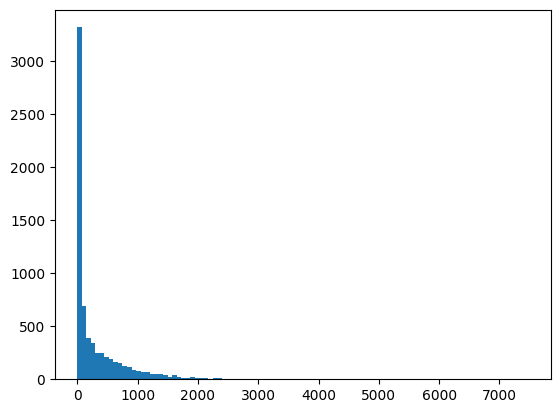

In [ ]:
# Построение гистограммы распределения длин текстов в словах
import matplotlib.pyplot as plt
seq_len = [len(x) for x in txt_se]
plt.hist(seq_len, 100)
plt.show()

In [ ]:
# Создание матрицы "урезанной" эмбединг последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq_max_len = 1200
txt_seq_1k = pad_sequences(txt_se, maxlen=seq_max_len, dtype='float32', padding='post', truncating='post', value=0.0)
txt_seq_1k.shape

(6921, 1200)

In [ ]:
# Создание матрицы "полной" эмбединг последовательности
txt_seq = pad_sequences(txt_se, maxlen=None, dtype='float32', padding='post', truncating='pre', value=0.0)
txt_seq.shape

(6921, 7479)

In [ ]:
txt_seq_1k[n]

array([ 243.,  191., 1030., ...,    0.,    0.,    0.], dtype=float32)

In [ ]:
counts = df.count(axis=0)
conditions = round(df.count(axis=0)/len(df)*100,2)
uniques = df.nunique(axis=0)
types = df.dtypes
df_x = pd.concat([counts.to_frame(name='Заполнено строк'), uniques.to_frame(name='Уникальных зн.'), conditions.to_frame(name='Процент заполнения'), types.to_frame(name='Тип данных')], axis= 1 )
df_x

,Заполнено строк,Уникальных зн.,Процент заполнения,Тип данных
Name,6921,3,100.00,object
Имя файла,6921,6921,100.00,object
whisper,6921,5716,100.00,object
Статус,6921,2,100.00,object
Тип,6921,8,100.00,object
Дата и время,6921,6903,100.00,object
Номер абонента,6921,5220,100.00,int64
Длительность звонка,6921,917,100.00,int64
Сотрудник,6920,45,99.99,object
ID посетителя,6921,1750,100.00,float64


#### Сохранение

In [ ]:
# Сохранение токенайзера
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_tokenizer_txt.pkl', 'wb') as f:
  pkl.dump(tokenizer_txt, f)

#### Загрузка

In [ ]:
# Загрузка токенайзера
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_tokenizer_txt.pkl', 'rb') as f:
  tokenizer_txt = pkl.load(f)

### OHE матрица

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
import numpy as np
def df_to_ohe(df,collist,lst_encoders = {}):
  '''
 Процедура поочередного преобразования колонок из списка через LabelEncoder в ОНЕ
 С последующей сборкой в единый массив. Параметры:
 df - датафрейм
 collist - список колонок
 Возвращает собранный массив и список энкодеров
  '''
  create_encode = True if len(lst_encoders) == 0 else False
  #print(create_encode)
  list_code = []
  for i in range(len(collist)):

    if create_encode:
      print(f'Формирование Labelencoder и кодировка колонки {collist[i]}', end='')
      encoder = LabelEncoder()
      encoder.fit(df[collist[i]].tolist())
      lst_encoders[collist[i]] = encoder
      list_code.append(utils.to_categorical(encoder.transform(df[collist[i]].tolist()),df[collist[i]].nunique()))
      print(' - Успешно')
    else:
      #print(f'Кодируется колонка {collist[i]}', end='')
      encoder = lst_encoders[collist[i]]
      list_code.append(utils.to_categorical(encoder.transform(df[collist[i]].tolist()),len((encoder.classes_))))
      #print(' - Успешно')

  x_data = np.hstack(list_code)
  return x_data, lst_encoders

In [ ]:
col_to_ohe = ['Статус', 'Тип', 'Сайт', 'Тип посетителя', 'Сценарий', 'Операции', 'Тип устройства', 'Первая рекламная кампания']
df[col_to_ohe] = df[col_to_ohe].fillna('Нет данных') # дозаполним незаполненные данные
OHE_data, encoders = df_to_ohe(df, col_to_ohe, lst_encoders = {})
OHE_data = OHE_data.astype('float32')
OHE_data.shape

Формирование Labelencoder и кодировка колонки Статус - Успешно
Формирование Labelencoder и кодировка колонки Тип - Успешно
Формирование Labelencoder и кодировка колонки Сайт - Успешно
Формирование Labelencoder и кодировка колонки Тип посетителя - Успешно
Формирование Labelencoder и кодировка колонки Сценарий - Успешно
Формирование Labelencoder и кодировка колонки Операции - Успешно
Формирование Labelencoder и кодировка колонки Тип устройства - Успешно
Формирование Labelencoder и кодировка колонки Первая рекламная кампания - Успешно


(6921, 175)

In [ ]:
# Сохранение энкодеров
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_encoders.pkl', 'wb') as f:
  pkl.dump(encoders, f)

In [ ]:
# Загрузка энкодеров
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_encoders.pkl', 'rb') as f:
  encoders = pkl.load(f)

### Числовые данные

In [ ]:
# Массив из числовых колонок (которые могут иметь значение)
digit_col = ['Чистая длительность разговора', 'Номер обращения', 'ID посетителя']
df[digit_col] = df[digit_col].fillna(0) # дозаполнение, если есть незаполненные данные
df['ID посетителя'] = df['ID посетителя']/100000000 # понижение разрядности колонки для более плавной нормализации
x_data = np.array(df[digit_col].values)
x_data = x_data.astype('float32')
print(x_data.shape,'макс. значение - ', x_data.max())
x_data[:20]

(6921, 3) макс. значение -  6927.0


array([[1.0000000e+00, 2.0000000e+00, 7.0464353e-07],
       [3.0000000e+00, 2.0000000e+00, 7.0987215e-07],
       [2.0000000e+01, 1.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 1.0000000e+00, 7.3719315e-07],
       [3.9400000e+02, 2.0000000e+00, 7.4341477e-07],
       [5.0000000e+01, 1.0000000e+00, 7.4341477e-07],
       [1.1400000e+02, 2.0000000e+00, 0.0000000e+00],
       [4.4800000e+02, 3.4000000e+01, 0.0000000e+00],
       [4.7000000e+01, 3.0000000e+00, 0.0000000e+00],
       [5.3000000e+01, 4.0000000e+00, 0.0000000e+00],
       [6.2000000e+01, 2.0000000e+00, 0.0000000e+00],
       [6.2000000e+01, 1.0000000e+00, 0.0000000e+00],
       [4.4700000e+02, 1.1000000e+01, 7.4341551e-07],
       [5.0000000e+01, 2.0000000e+00, 0.0000000e+00],
       [6.1000000e+01, 1.0000000e+00, 0.0000000e+00],
       [4.0000000e+01, 6.0000000e+00, 0.0000000e+00],
       [1.7200000e+02, 1.0000000e+00, 0.0000000e+00],
       [3.1500000e+02, 1.0000000e+00, 0.0000000e+00],
       [6.2000000e+01, 5.000

In [ ]:
# Нормализация массива
max_val = x_data.max()
x_data = x_data / max_val
x_data[:20]

array([[1.4436264e-04, 2.8872528e-04, 1.0172420e-10],
       [4.3308793e-04, 2.8872528e-04, 1.0247902e-10],
       [2.8872527e-03, 1.4436264e-04, 0.0000000e+00],
       [2.8872528e-04, 1.4436264e-04, 1.0642315e-10],
       [5.6878880e-02, 2.8872528e-04, 1.0732132e-10],
       [7.2181318e-03, 1.4436264e-04, 1.0732132e-10],
       [1.6457342e-02, 2.8872528e-04, 0.0000000e+00],
       [6.4674459e-02, 4.9083298e-03, 0.0000000e+00],
       [6.7850440e-03, 4.3308793e-04, 0.0000000e+00],
       [7.6512201e-03, 5.7745056e-04, 0.0000000e+00],
       [8.9504840e-03, 2.8872528e-04, 0.0000000e+00],
       [8.9504840e-03, 1.4436264e-04, 0.0000000e+00],
       [6.4530097e-02, 1.5879890e-03, 1.0732142e-10],
       [7.2181318e-03, 2.8872528e-04, 0.0000000e+00],
       [8.8061206e-03, 1.4436264e-04, 0.0000000e+00],
       [5.7745054e-03, 8.6617586e-04, 0.0000000e+00],
       [2.4830373e-02, 1.4436264e-04, 0.0000000e+00],
       [4.5474231e-02, 1.4436264e-04, 0.0000000e+00],
       [8.9504840e-03, 7.218

### Выходные тензоры

In [ ]:
target = np.array(df.target.values,dtype='float32')
print(target.shape)
target[:20]

(6921,)


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0.], dtype=float32)

In [ ]:
targetall = np.array(df.targetall.values,dtype='float32')
print(targetall.shape)
targetall[:20]

(6921,)


array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1.], dtype=float32)

In [ ]:
klass = np.array(df.klass.values,dtype='float32')
print(klass.shape)
klass[:20]

(6921,)


array([0., 0., 0., 0., 2., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 2.,
       1., 0., 1.], dtype=float32)

### Сохранение предобработанных данных

In [ ]:
# Сохранение сформированных массивов
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_x_y_array.pkl', 'wb') as f:
  pkl.dump([txt_bow, txt_seq, txt_seq_1k, OHE_data, x_data, target, targetall, klass], f)

### Загрузка предобработанных данных

In [ ]:
# Загрузка предобработанных данных
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_x_y_array.pkl', 'rb') as f:
  txt_bow, txt_seq, txt_seq_1k, OHE_data, x_data, target, targetall, klass = pkl.load(f)

### Обучающая, проверочная и тестовая выборки

In [ ]:
# Массивы: txt_bow, txt_seq, txt_seq_1k, OHE_data, x_data, target, targetall, klass
from sklearn.model_selection import train_test_split

txt_bow_1,    txt_bow_val,    \
txt_seq_1,    txt_seq_val,    \
txt_seq_1k_1, txt_seq_1k_val, \
OHE_data_1,   OHE_data_val,   \
x_data_1,     x_data_val,     \
target_1,     target_val,     \
targetall_1,  targetall_val,  \
klass_1,      klass_val       \
 = train_test_split(txt_bow,
                    txt_seq,
                    txt_seq_1k,
                    OHE_data,
                    x_data,
                    target,
                    targetall,
                    klass,
                    test_size=0.2,
                    random_state=42,
                    stratify=klass)

txt_bow_train, txt_bow_test,       \
txt_seq_train, txt_seq_test,       \
txt_seq_1k_train, txt_seq_1k_test, \
OHE_data_train, OHE_data_test,     \
x_data_train, x_data_test,         \
target_train, target_test,         \
targetall_train, targetall_test,   \
klass_train, klass_test            \
 = train_test_split(txt_bow_1,
                    txt_seq_1,
                    txt_seq_1k_1,
                    OHE_data_1,
                    x_data_1,
                    target_1,
                    targetall_1,
                    klass_1,
                    test_size=0.25,
                    random_state=42,
                    stratify=klass_1)

### Модель

#### 1

##### Создание и обучение

In [ ]:
# Колбак
from tensorflow.keras.callbacks import ModelCheckpoint
mycolback = ModelCheckpoint('/content/drive/MyDrive/media108.ru/Модели/model9_1.h5',
                            monitor='val_accuracy',
                            verbose=1,
                            mode='max',
                            save_best_only=True)

In [ ]:
# Создание раветвлённой модели
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

input_x1 = Input(shape=(txt_bow.shape[1]),  name = 'input_x1')
input_x2 = Input(shape=(OHE_data.shape[1]), name = 'input_x2')
input_x3 = Input(shape=(x_data.shape[1]),   name = 'input_x3')

x1 = Dense(500, activation = 'relu') (input_x1)
x1 = BatchNormalization() (x1)
x1 = Dropout(0.6) (x1)
#x1 = Dense(128, activation = 'relu') (x1)
#x1 = Dropout(0.5) (x1)
x1 = Dense(32, activation = 'relu') (x1)

x2 = Dense(48, activation = 'relu') (input_x2)
x2 = BatchNormalization() (x2)
x2 = Dropout(0.6) (x2)
#x2 = Dense(32, activation = 'relu') (x2)
#x2 = Dropout(0.5) (x2)
x2 = Dense(16, activation = 'relu') (x2)

x3 = Dense(32, activation = 'relu') (input_x3)
x3 = BatchNormalization() (x3)
x3 = Dropout(0.6) (x3)
x3 = Dense(16, activation = 'relu') (x3)

x = concatenate([x1, x2, x3])
x = BatchNormalization() (x)
x = Dense(16, activation='relu') (x)

x = Dropout(0.6) (x)

output = Dense(1, activation='sigmoid', name = 'output') (x)

model = Model ([input_x1, input_x2, input_x3], output)

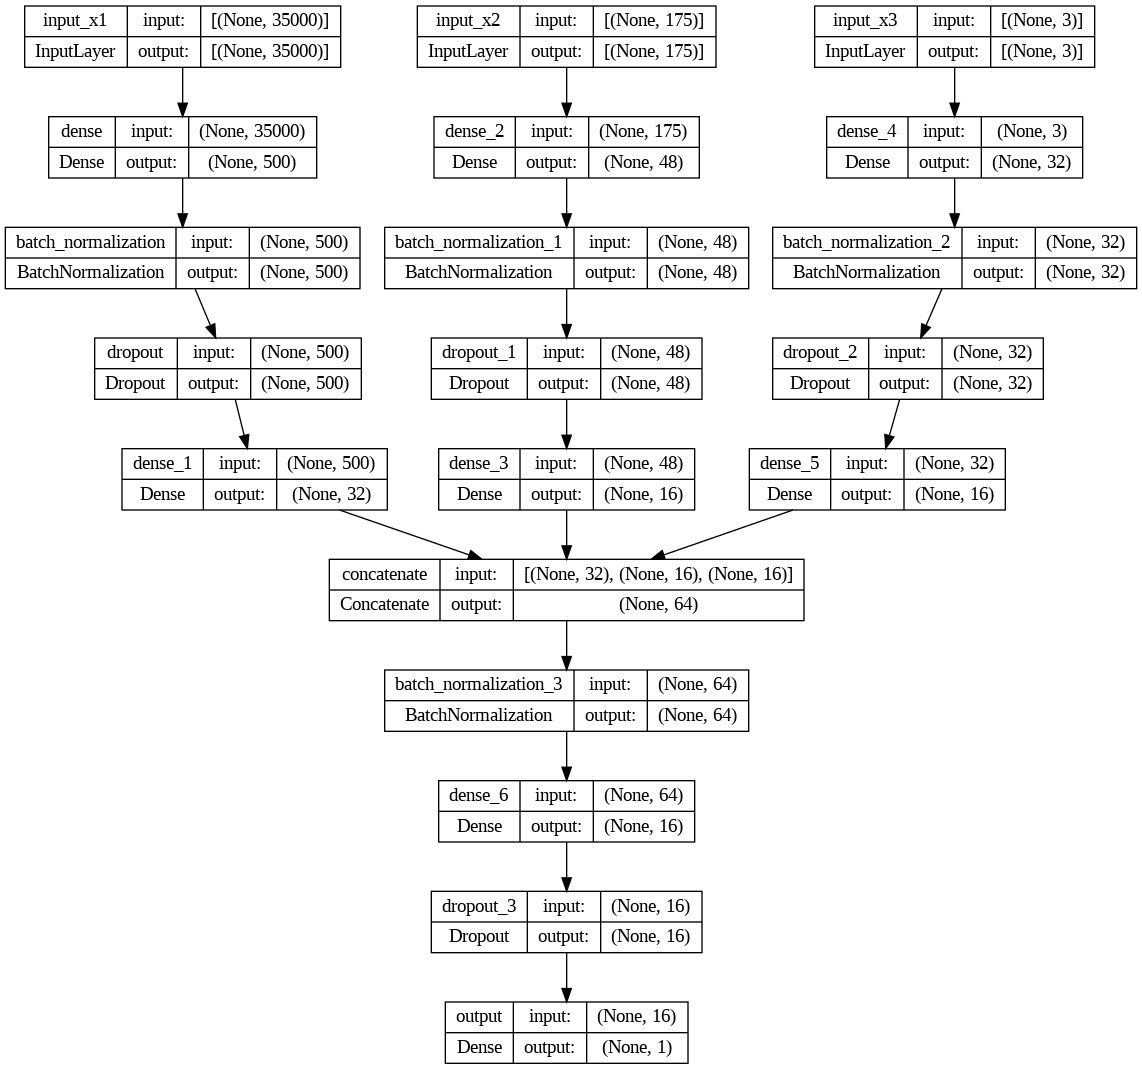

In [ ]:
# Структура
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

In [ ]:
# Компиляция и обучение
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, target_train,
                     batch_size=32,
                     validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val}, target_val),
                     epochs=10,
                     verbose=1,
                     callbacks=mycolback,
                     shuffle=True)

Epoch 1/10
129/130 [============================>.] - ETA: 0s - loss: 0.5657 - accuracy: 0.7275
Epoch 1: val_accuracy improved from -inf to 0.37617, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 17s 35ms/step - loss: 0.5647 - accuracy: 0.7283 - val_loss: 0.6990 - val_accuracy: 0.3762
Epoch 2/10
127/130 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.7968
Epoch 2: val_accuracy improved from 0.37617 to 0.76390, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_1.h5
130/130 [==============================] - 3s 23ms/step - loss: 0.4416 - accuracy: 0.7972 - val_loss: 0.5361 - val_accuracy: 0.7639
Epoch 3/10
129/130 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8176
Epoch 3: val_accuracy improved from 0.76390 to 0.87292, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_1.h5
130/130 [==============================] - 3s 26ms/step - loss: 0.3900 - accuracy: 0.8172 - val_loss: 0.3505 - val_accuracy: 0.8729
Epoch 4/10
128/130 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8481
Epoch 4: val_accuracy improved from 0.87292 to 0.89097, saving 

In [ ]:
# Компиляция и дообучение
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, target_train,
                     batch_size=48,
                     validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val}, target_val),
                     epochs=10,
                     verbose=1,
                     callbacks=mycolback,
                     shuffle=True)

Epoch 1/10
86/87 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9360
Epoch 1: val_accuracy did not improve from 0.90758
87/87 [==============================] - 8s 34ms/step - loss: 0.1877 - accuracy: 0.9359 - val_loss: 0.2403 - val_accuracy: 0.9011
Epoch 2/10
87/87 [==============================] - ETA: 0s - loss: 0.1838 - accuracy: 0.9393
Epoch 2: val_accuracy did not improve from 0.90758
87/87 [==============================] - 2s 27ms/step - loss: 0.1838 - accuracy: 0.9393 - val_loss: 0.2403 - val_accuracy: 0.9011
Epoch 3/10
86/87 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9344
Epoch 3: val_accuracy did not improve from 0.90758
87/87 [==============================] - 2s 24ms/step - loss: 0.1879 - accuracy: 0.9340 - val_loss: 0.2420 - val_accuracy: 0.9004
Epoch 4/10
85/87 [============================>.] - ETA: 0s - loss: 0.1819 - accuracy: 0.9400
Epoch 4: val_accuracy did not improve from 0.90758
87/87 [=======================

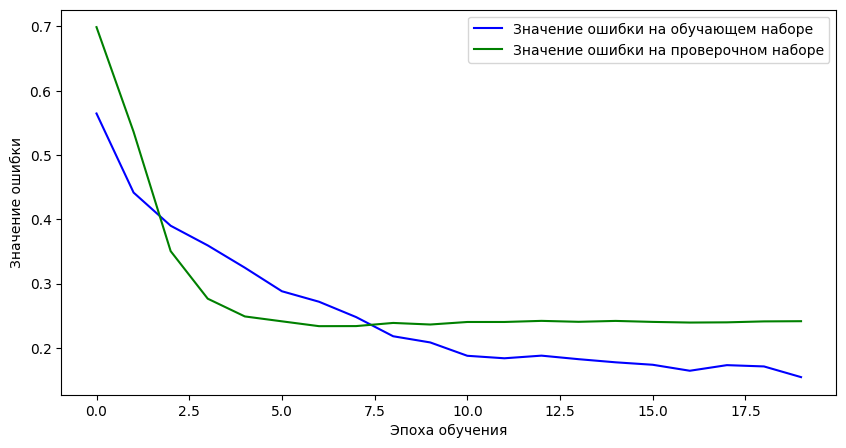

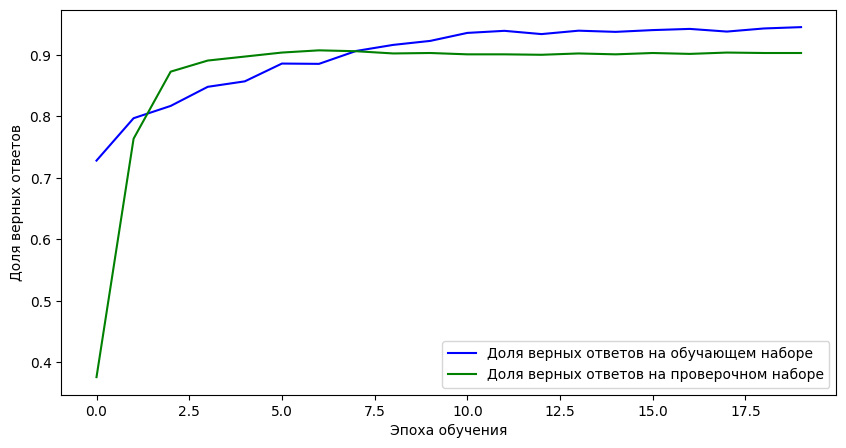

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(history1.history['loss']+history2.history['loss'],
         label='Значение ошибки на обучающем наборе',color='b')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],
         label='Значение ошибки на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
#plt.style.use('ggplot')
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(history1.history['accuracy']+history2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе',color='b')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend(loc='lower right')
plt.show()

##### Тест

In [ ]:
# Предсказание для тестовой выборки
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_1.h5')
y_pred = model.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 0s 395ms/step


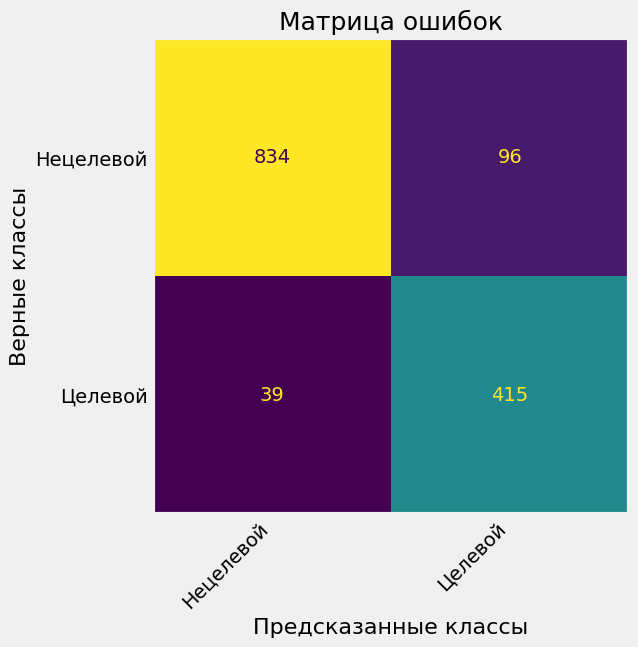

In [ ]:
# Построение матрицы ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,
                      np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       930
         1.0       0.81      0.91      0.86       454

    accuracy                           0.90      1384
   macro avg       0.88      0.91      0.89      1384
weighted avg       0.91      0.90      0.90      1384



#### 2

##### `model9_2_2`

###### Создание и обучение

In [ ]:
# Колбак
from tensorflow.keras.callbacks import ModelCheckpoint
mycolback2 = ModelCheckpoint('/content/drive/MyDrive/media108.ru/Модели/model9_2_2.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             mode='max',
                             save_best_only=True)

In [ ]:
txt_bow_train = txt_bow_train.astype('float32')
txt_bow_val = txt_bow_val.astype('float32')
#x_data = x_data
x_data_train = x_data_train.astype('float32')
x_data_val = x_data_val.astype('float32')
OHE_data_train = OHE_data_train.astype('float32')
OHE_data_val = OHE_data_val.astype('float32')
target_train = target_train.astype('float32')
target_val = target_val.astype('float32')

In [ ]:
# Создание раветвлённой модели
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

input_x1 = Input(shape=(txt_bow.shape[1]), name = 'input_x1')
input_x2 = Input(shape=(OHE_data.shape[1]), name = 'input_x2')
input_x3 = Input(shape=(x_data.shape[1]), name = 'input_x3')

x1 = Dense(500, activation = 'relu') (input_x1)
x1 = BatchNormalization() (x1)
x1 = Dropout(0.6) (x1)
#x1 = Dense(128, activation = 'relu') (x1)
#x1 = Dropout(0.5) (x1)
x1 = Dense(32, activation = 'relu') (x1)

x2 = Dense(48, activation = 'relu') (input_x2)
x2 = BatchNormalization() (x2)
x2 = Dropout(0.6) (x2)
#x2 = Dense(32, activation = 'relu') (x2)
#x2 = Dropout(0.5) (x2)
x2 = Dense(16, activation = 'relu') (x2)

x3 = Dense(32, activation = 'relu') (input_x3)
x3 = BatchNormalization() (x3)
x3 = Dropout(0.6) (x3)
x3 = Dense(16, activation = 'relu') (x3)

x = concatenate([x1, x2, x3])
x = BatchNormalization() (x)
x = Dense(16, activation='relu') (x)

x = Dropout(0.6) (x)

output = Dense(1, activation='sigmoid', name = 'output') (x)

model2 = Model ([input_x1, input_x2, input_x3], output)

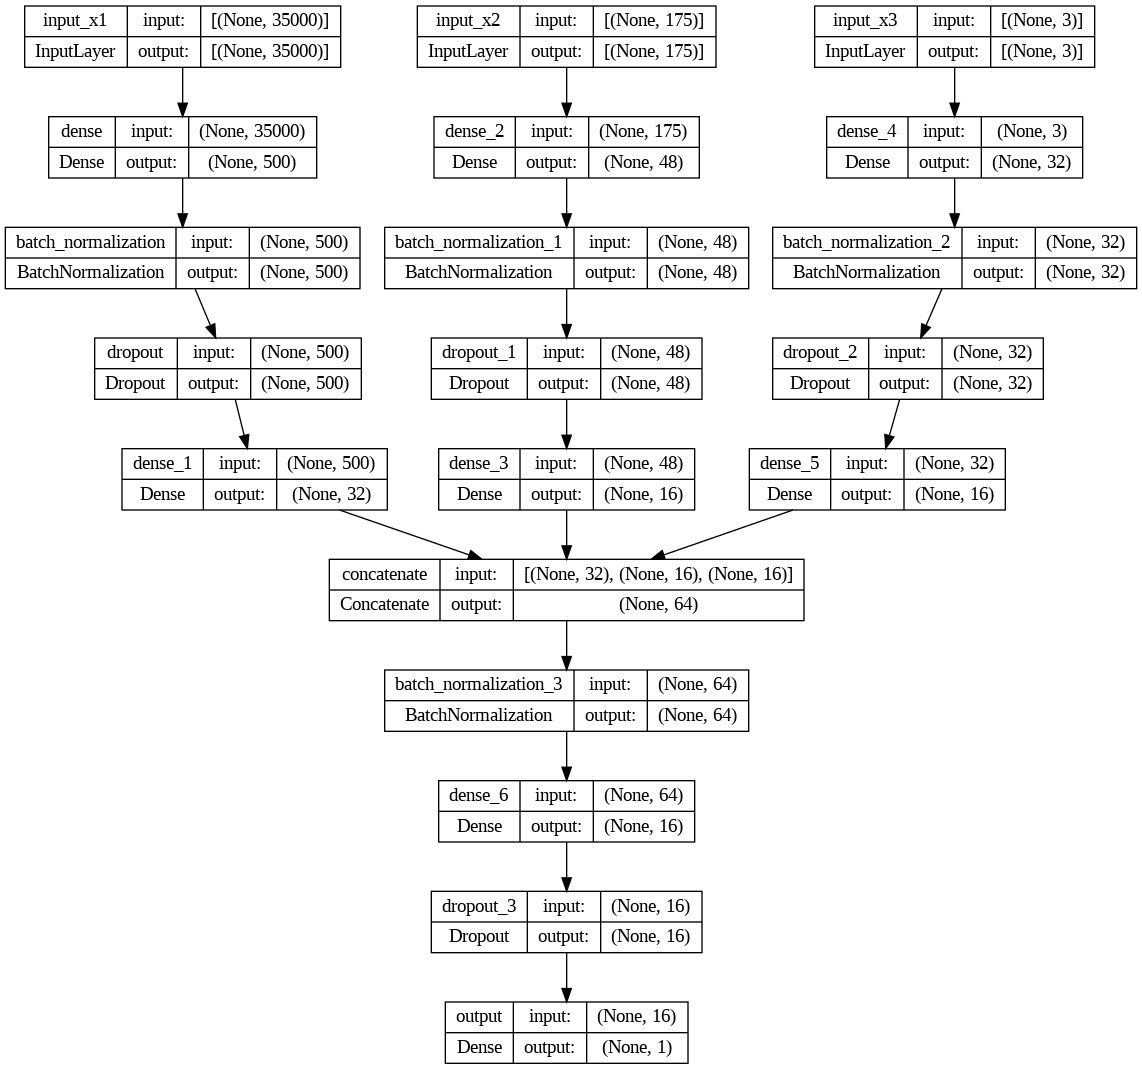

In [ ]:
# Структура
from tensorflow.keras import utils
utils.plot_model(model2, show_shapes=True)

In [ ]:
# Компиляция и обучение
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
model2.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=[tfa.metrics.F1Score(num_classes=1),'accuracy'])
history1 = model2.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, target_train,
                      batch_size=32,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val}, target_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback2,
                      shuffle=True)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/10
130/130 [==============================] - ETA: 0s - loss: 0.6748 - f1_score: 0.4946 - accuracy: 0.6756
Epoch 1: val_accuracy improved from -inf to 0.87942, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_2_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 20s 29ms/step - loss: 0.6748 - f1_score: 0.4946 - accuracy: 0.6756 - val_loss: 0.5499 - val_f1_score: 0.4946 - val_accuracy: 0.8794
Epoch 2/10
129/130 [============================>.] - ETA: 0s - loss: 0.4751 - f1_score: 0.4940 - accuracy: 0.7849
Epoch 2: val_accuracy improved from 0.87942 to 0.89386, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_2_2.h5
130/130 [==============================] - 4s 32ms/step - loss: 0.4735 - f1_score: 0.4946 - accuracy: 0.7859 - val_loss: 0.4507 - val_f1_score: 0.4946 - val_accuracy: 0.8939
Epoch 3/10
130/130 [==============================] - ETA: 0s - loss: 0.4106 - f1_score: 0.4946 - accuracy: 0.8160
Epoch 3: val_accuracy improved from 0.89386 to 0.89531, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_2_2.h5
130/130 [==============================] - 5s 37ms/step - loss: 0.4106 - f1_score: 0.4946 - accuracy: 0.8160 - val_loss: 0.3225 - val_f1_score: 0.4946 - val_accuracy

In [ ]:
# Компиляция и дообучение
from tensorflow.keras.saving import load_model
model2 = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_2_2.h5')
model2.compile(optimizer=Adam(learning_rate=0.000001), loss='binary_crossentropy', metrics=[tfa.metrics.F1Score(num_classes=1),'accuracy'])
history2 = model2.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, target_train,
                      batch_size=48,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val},target_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback2,
                      shuffle=True)

Epoch 1/10
86/87 [============================>.] - ETA: 0s - loss: 0.2140 - f1_score: 0.4948 - accuracy: 0.9181
Epoch 1: val_accuracy did not improve from 0.90975
87/87 [==============================] - 10s 31ms/step - loss: 0.2134 - f1_score: 0.4946 - accuracy: 0.9184 - val_loss: 0.2302 - val_f1_score: 0.4946 - val_accuracy: 0.9076
Epoch 2/10
84/87 [===========================>..] - ETA: 0s - loss: 0.2049 - f1_score: 0.4964 - accuracy: 0.9261
Epoch 2: val_accuracy did not improve from 0.90975
87/87 [==============================] - 2s 19ms/step - loss: 0.2038 - f1_score: 0.4946 - accuracy: 0.9268 - val_loss: 0.2305 - val_f1_score: 0.4946 - val_accuracy: 0.9069
Epoch 3/10
84/87 [===========================>..] - ETA: 0s - loss: 0.2026 - f1_score: 0.4944 - accuracy: 0.9273
Epoch 3: val_accuracy did not improve from 0.90975
87/87 [==============================] - 2s 18ms/step - loss: 0.2018 - f1_score: 0.4946 - accuracy: 0.9280 - val_loss: 0.2310 - val_f1_score: 0.4946 - val_accuracy

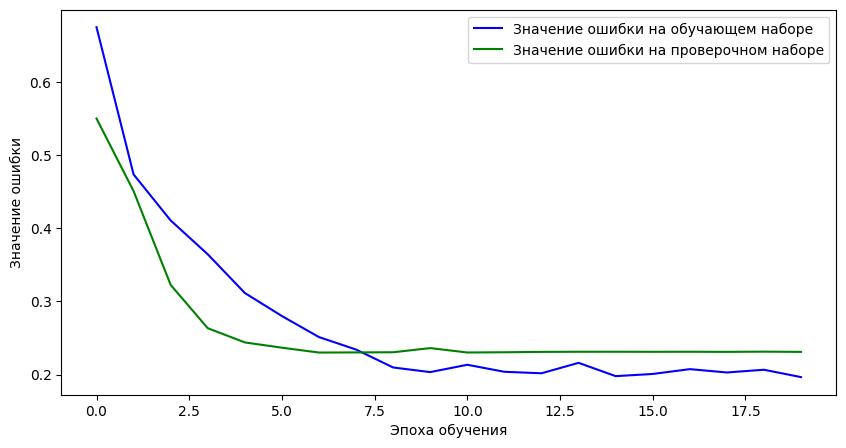

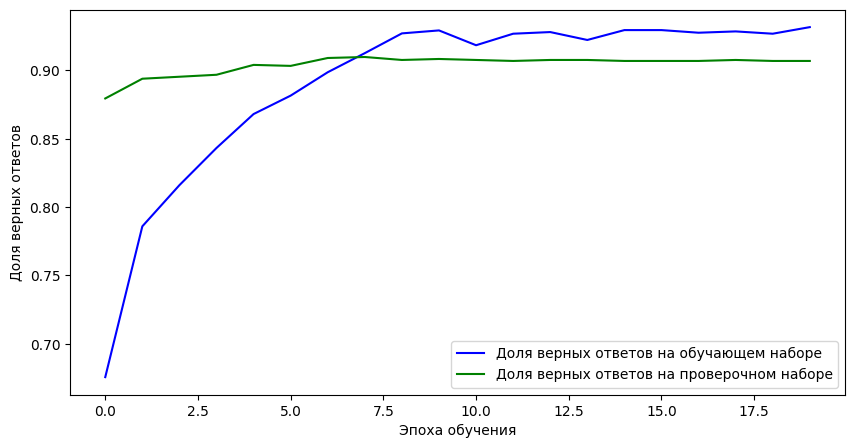

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(history1.history['loss']+history2.history['loss'],
         label='Значение ошибки на обучающем наборе',color='b')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],
         label='Значение ошибки на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
#plt.style.use('ggplot')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения метрика "accuracy"
plt.figure(figsize = (10, 5))
plt.plot(history1.history['accuracy']+history2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе',color='b')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend(loc='lower right')
plt.show()

###### Тест

In [ ]:
# Предсказание для тестовой выборки
y_pred = model2.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 1s 1s/step


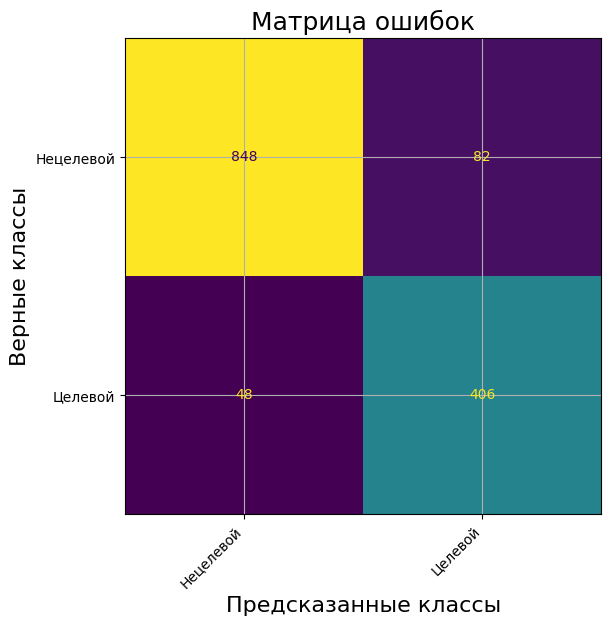

In [ ]:
# Построение матрицы ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,
                      np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       930
         1.0       0.83      0.89      0.86       454

    accuracy                           0.91      1384
   macro avg       0.89      0.90      0.90      1384
weighted avg       0.91      0.91      0.91      1384



##### `model9_2`

###### Загрузка

In [ ]:
# Загрузка модели нейронной сети
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_2.h5')

###### Тест

In [ ]:
# Предсказание для тестовой выборки
y_pred = model.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 4s 4s/step


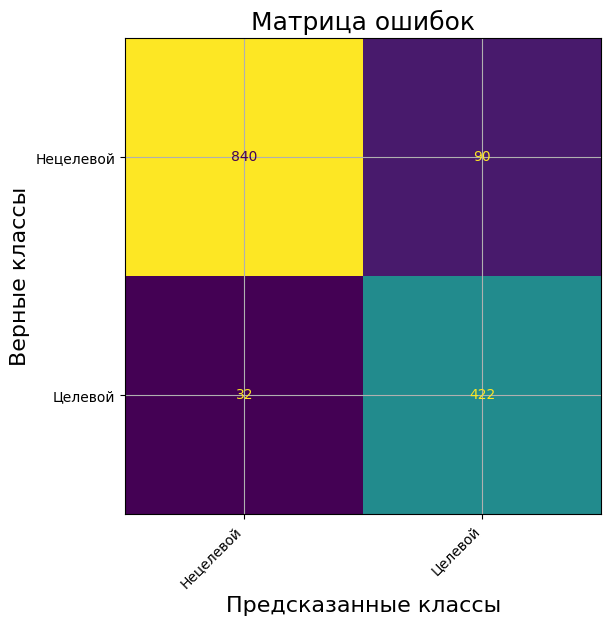

In [ ]:
# Построение матрицы ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,
                      np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       930
         1.0       0.82      0.93      0.87       454

    accuracy                           0.91      1384
   macro avg       0.89      0.92      0.90      1384
weighted avg       0.92      0.91      0.91      1384



#### 3

##### Создание и обучение

Обучение по колонке targetall.

In [ ]:
# Колбак
from tensorflow.keras.callbacks import ModelCheckpoint
mycolback3 = ModelCheckpoint('/content/drive/MyDrive/media108.ru/Модели/model9_3.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             mode='max',
                             save_best_only=True)

In [ ]:
txt_bow_train = txt_bow_train.astype('float32')
txt_bow_val = txt_bow_val.astype('float32')
#x_data = x_data
x_data_train = x_data_train.astype('float32')
x_data_val = x_data_val.astype('float32')
OHE_data_train = OHE_data_train.astype('float32')
OHE_data_val = OHE_data_val.astype('float32')
targetall_train = target_train.astype('float32')
targetall_val = target_val.astype('float32')

In [ ]:
# Создание раветвлённой модели
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

input_x1 = Input(shape=(txt_bow.shape[1]), name = 'input_x1')
input_x2 = Input(shape=(OHE_data.shape[1]), name = 'input_x2')
input_x3 = Input(shape=(x_data.shape[1]), name = 'input_x3')

x1 = Dense(500, activation = 'relu') (input_x1)
x1 = BatchNormalization() (x1)
x1 = Dropout(0.6) (x1)
#x1 = Dense(128, activation = 'relu') (x1)
#x1 = Dropout(0.5) (x1)
x1 = Dense(32, activation = 'relu') (x1)

x2 = Dense(48, activation = 'relu') (input_x2)
x2 = BatchNormalization() (x2)
x2 = Dropout(0.6) (x2)
#x2 = Dense(32, activation = 'relu') (x2)
#x2 = Dropout(0.5) (x2)
x2 = Dense(16, activation = 'relu') (x2)

x3 = Dense(32, activation = 'relu') (input_x3)
x3 = BatchNormalization() (x3)
x3 = Dropout(0.6) (x3)
x3 = Dense(16, activation = 'relu') (x3)

x = concatenate([x1, x2, x3])
x = BatchNormalization() (x)
x = Dense(16, activation='relu') (x)

x = Dropout(0.6) (x)

output = Dense(1, activation='sigmoid', name = 'output') (x)

model3 = Model ([input_x1, input_x2, input_x3], output)

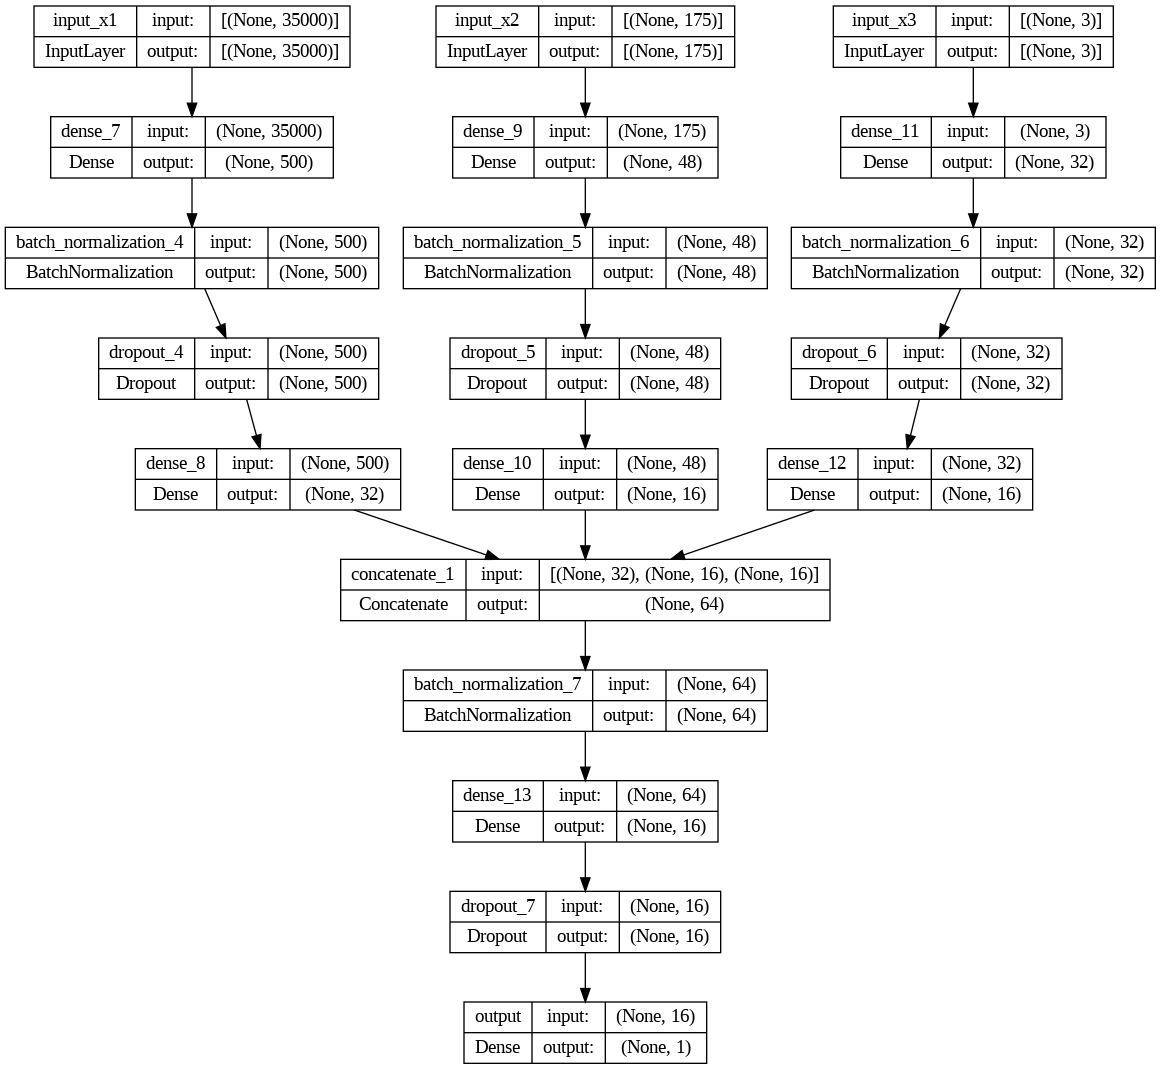

In [ ]:
# Структура
from tensorflow.keras import utils
utils.plot_model(model3, show_shapes=True)

In [ ]:
# Компиляция и обучение
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['F1Score','accuracy'])
history1 = model3.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, targetall_train,
                      batch_size=32, validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val}, targetall_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback3,
                      shuffle=True)

Epoch 1/10
128/130 [============================>.] - ETA: 0s - loss: 0.6499 - f1_score: 0.4947 - accuracy: 0.7000
Epoch 1: val_accuracy improved from -inf to 0.38484, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 9s 32ms/step - loss: 0.6486 - f1_score: 0.4946 - accuracy: 0.7009 - val_loss: 0.6854 - val_f1_score: 0.4946 - val_accuracy: 0.3848
Epoch 2/10
127/130 [============================>.] - ETA: 0s - loss: 0.4593 - f1_score: 0.4931 - accuracy: 0.7904
Epoch 2: val_accuracy improved from 0.38484 to 0.74079, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_3.h5
130/130 [==============================] - 5s 36ms/step - loss: 0.4590 - f1_score: 0.4946 - accuracy: 0.7909 - val_loss: 0.5600 - val_f1_score: 0.4946 - val_accuracy: 0.7408
Epoch 3/10
129/130 [============================>.] - ETA: 0s - loss: 0.4192 - f1_score: 0.4934 - accuracy: 0.8077
Epoch 3: val_accuracy improved from 0.74079 to 0.86787, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_3.h5
130/130 [==============================] - 5s 40ms/step - loss: 0.4206 - f1_score: 0.4946 - accuracy: 0.8068 - val_loss: 0.3663 - val_f1_score: 0.4946 - val_accuracy: 0.8

In [ ]:
# Компиляция и дообучение
model3 = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_3.h5')
model3.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['F1Score','accuracy'])
history2 = model3.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train}, targetall_train,
                      batch_size=24,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val}, targetall_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback3,
                      shuffle=True)

Epoch 1/10
172/173 [============================>.] - ETA: 0s - loss: 0.2166 - f1_score: 0.4943 - accuracy: 0.9150
Epoch 1: val_accuracy did not improve from 0.91264
173/173 [==============================] - 10s 34ms/step - loss: 0.2163 - f1_score: 0.4946 - accuracy: 0.9155 - val_loss: 0.2347 - val_f1_score: 0.4946 - val_accuracy: 0.9112
Epoch 2/10
173/173 [==============================] - ETA: 0s - loss: 0.1916 - f1_score: 0.4948 - accuracy: 0.9294
Epoch 2: val_accuracy did not improve from 0.91264
173/173 [==============================] - 3s 18ms/step - loss: 0.1916 - f1_score: 0.4948 - accuracy: 0.9294 - val_loss: 0.2344 - val_f1_score: 0.4946 - val_accuracy: 0.9119
Epoch 3/10
171/173 [============================>.] - ETA: 0s - loss: 0.1790 - f1_score: 0.4943 - accuracy: 0.9369
Epoch 3: val_accuracy did not improve from 0.91264
173/173 [==============================] - 3s 15ms/step - loss: 0.1783 - f1_score: 0.4947 - accuracy: 0.9374 - val_loss: 0.2733 - val_f1_score: 0.4946 - 

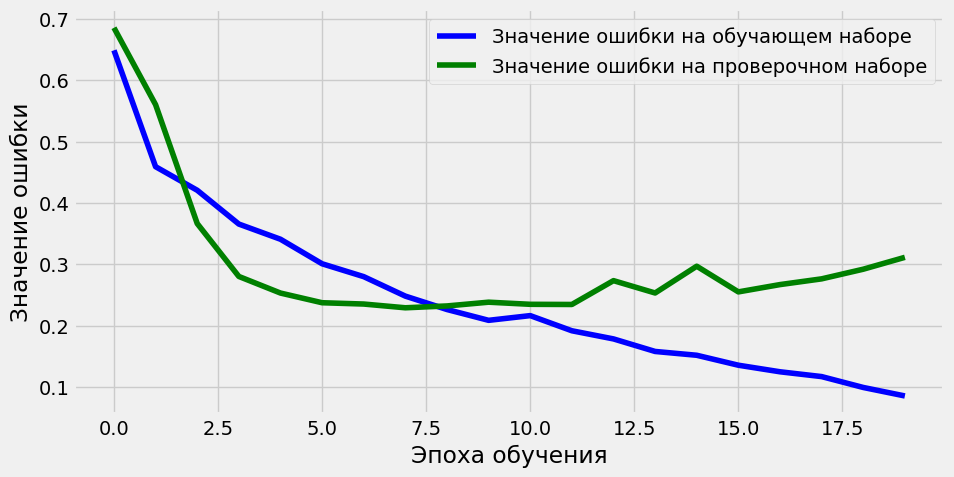

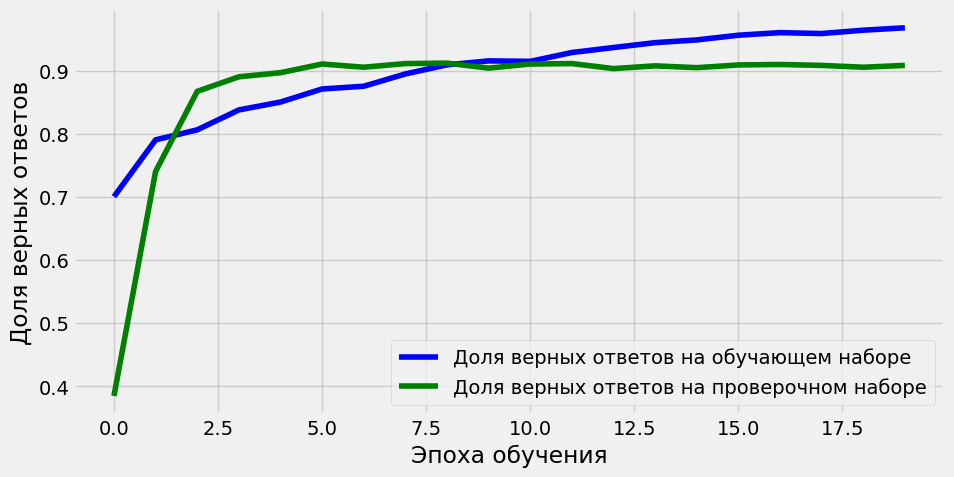

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(history1.history['loss']+history2.history['loss'],
         label='Значение ошибки на обучающем наборе',color='b')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],
         label='Значение ошибки на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
#plt.style.use('ggplot')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения метрика "accuracy"
plt.figure(figsize = (10, 5))
plt.plot(history1.history['accuracy']+history2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе',color='b')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend(loc='lower right')
plt.show()

##### Тест

In [ ]:
# Предсказание для тестовой выборки
y_pred = model3.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 0s 309ms/step


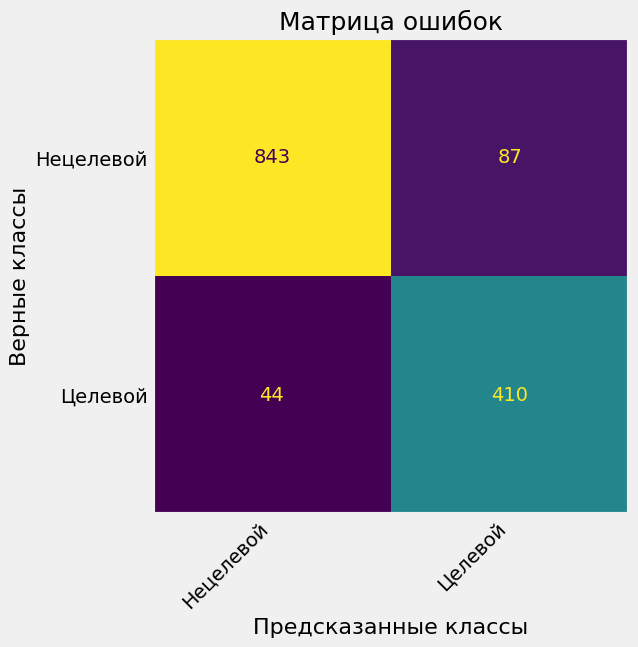

In [ ]:
# Построение матрицы ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,
                      np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       930
         1.0       0.82      0.90      0.86       454

    accuracy                           0.91      1384
   macro avg       0.89      0.90      0.90      1384
weighted avg       0.91      0.91      0.91      1384



#### 4

##### Создание и обучение

Добавляем 4-й вход (эмбединги).

In [ ]:
# Колбак
from tensorflow.keras.callbacks import ModelCheckpoint
mycolback4 = ModelCheckpoint('/content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             mode='max',
                             save_best_only=True)

In [ ]:
txt_bow_train = txt_bow_train.astype('float32')
txt_bow_val = txt_bow_val.astype('float32')

x_data_train = x_data_train.astype('float32')
x_data_val = x_data_val.astype('float32')

OHE_data_train = OHE_data_train.astype('float32')
OHE_data_val = OHE_data_val.astype('float32')

#txt_seq_train = txt_seq_train.astype('int32')
#txt_seq_val = txt_seq_val.astype('int32')

target_train = target_train.astype('float32')
target_val = target_val.astype('float32')

In [ ]:
# Создание раветвлённой модели
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

input_x1 = Input(shape=(txt_bow.shape[1]), name='input_x1')
input_x2 = Input(shape=(OHE_data.shape[1]), name='input_x2')
input_x3 = Input(shape=(x_data.shape[1]), name='input_x3')
input_x4 = Input(shape=(txt_seq_1k.shape[1]), name='input_x4')

x1 = Dense(500, activation = 'relu') (input_x1)
x1 = BatchNormalization() (x1)
x1 = Dropout(0.6) (x1)
x1 = Dense(32, activation = 'relu') (x1)

x2 = Dense(48, activation = 'relu') (input_x2)
x2 = BatchNormalization() (x2)
x2 = Dropout(0.6) (x2)
x2 = Dense(16, activation = 'relu') (x2)

x3 = Dense(32, activation = 'relu') (input_x3)
x3 = BatchNormalization() (x3)
x3 = Dropout(0.6) (x3)
x3 = Dense(16, activation = 'relu') (x3)

x4 = Embedding(input_dim = 35000, output_dim = 40, input_length = txt_seq_1k.shape[1]) (input_x4)
x4 = SpatialDropout1D(0.4 , name = 'Dropout1_x4') (x4)
x4 = BatchNormalization() (x4)
x4 = Conv1D(20, 5, activation='relu') (x4)
x4 = Conv1D(10, 5, activation='relu') (x4)
x4 = MaxPool1D(2) (x4)
x4 = Flatten(name = 'Flatten1_x1') (x4)
x4 = Dropout(0.4) (x4)
x4 = Dense(32, activation = 'relu') (x4)

xx = add([x1,x4])
xx = BatchNormalization() (xx)

xy = add([x2,x3])
xy = BatchNormalization() (xy)

x = concatenate([xx, xy])
#x = BatchNormalization() (x)
x = Dense(16, activation='relu') (x)
x = Dropout(0.6) (x)

output = Dense(1, activation='sigmoid', name = 'output') (x)

model4 = Model ([input_x1, input_x2, input_x3, input_x4], output)

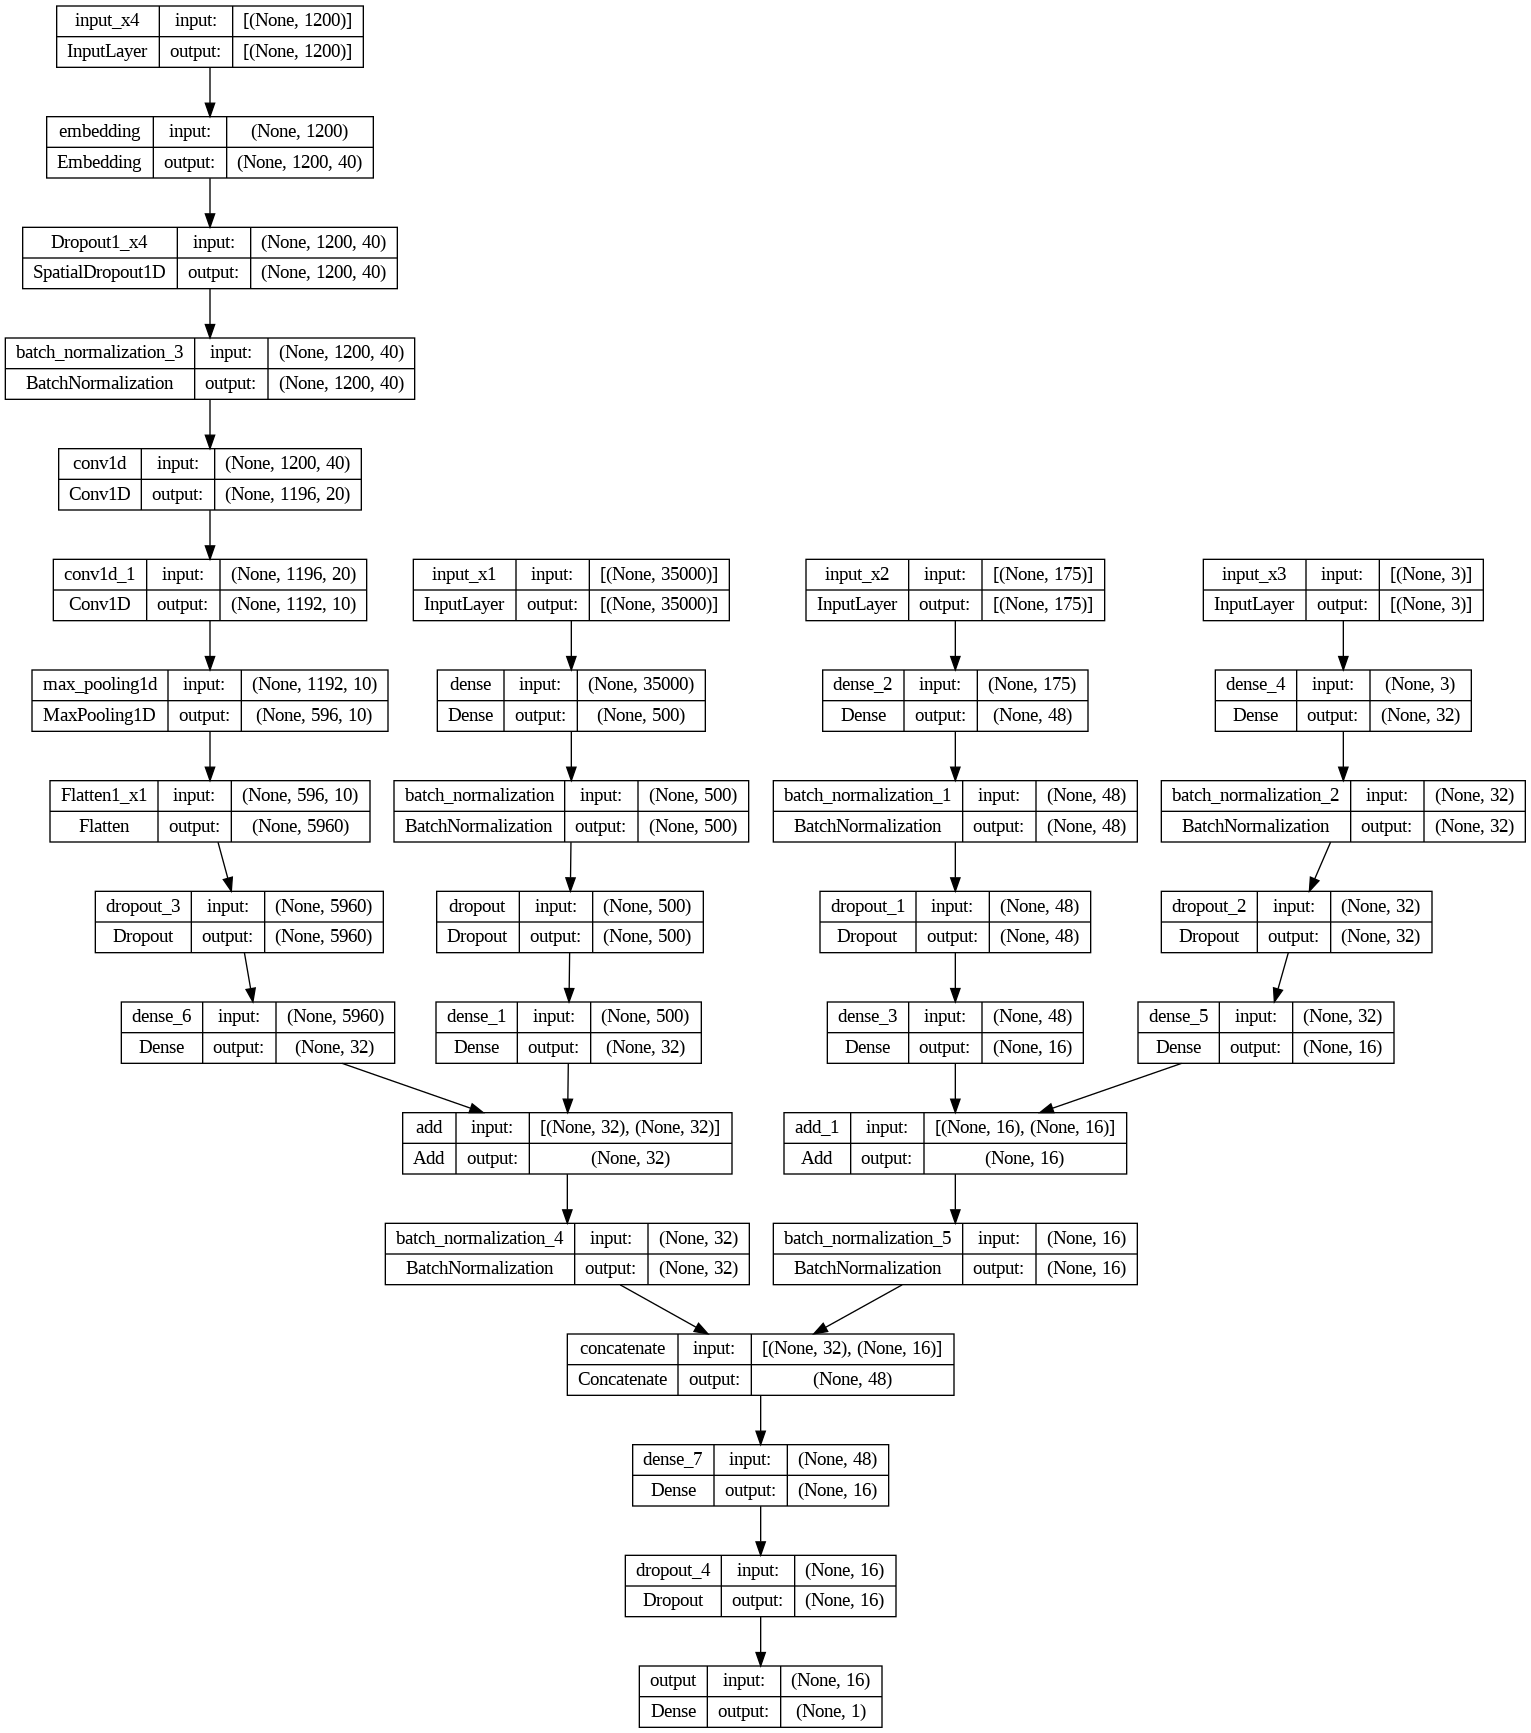

In [ ]:
# Структура
from tensorflow.keras import utils
utils.plot_model(model4, show_shapes=True)

In [ ]:
# Компиляция и обучение
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import F1Score
model4.compile(optimizer=SGD(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=[F1Score(),'accuracy'])
history1 = model4.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train,'input_x4':txt_seq_1k_train}, targetall_train,
                      batch_size=32,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val,'input_x4':txt_seq_1k_val}, targetall_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback4,
                      shuffle=True)

Epoch 1/10
130/130 [==============================] - ETA: 0s - loss: 0.9941 - f1_score: 0.6139 - accuracy: 0.4636
Epoch 1: val_accuracy improved from -inf to 0.44332, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 40s 171ms/step - loss: 0.9941 - f1_score: 0.6139 - accuracy: 0.4636 - val_loss: 0.7846 - val_f1_score: 0.6143 - val_accuracy: 0.4433
Epoch 2/10
129/130 [============================>.] - ETA: 0s - loss: 0.9010 - f1_score: 0.6138 - accuracy: 0.5031
Epoch 2: val_accuracy did not improve from 0.44332
130/130 [==============================] - 14s 109ms/step - loss: 0.9008 - f1_score: 0.6139 - accuracy: 0.5029 - val_loss: 0.7934 - val_f1_score: 0.6143 - val_accuracy: 0.4433
Epoch 3/10
130/130 [==============================] - ETA: 0s - loss: 0.8451 - f1_score: 0.6139 - accuracy: 0.5347
Epoch 3: val_accuracy did not improve from 0.44332
130/130 [==============================] - 15s 113ms/step - loss: 0.8451 - f1_score: 0.6139 - accuracy: 0.5347 - val_loss: 0.7467 - val_f1_score: 0.6143 - val_accuracy: 0.4433
Epoch 4/10
130/130 [==============================] - ETA: 0s - loss: 0.7953 - f1_score: 0.6139 - accuracy: 0.5520
Epoch 4: val_accuracy imp

In [ ]:
# Компиляция и дообучение
from tensorflow.keras.saving import load_model
model4 = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5')
from tensorflow.keras.optimizers import Adam
model4.compile(optimizer=Adam(learning_rate=0.00001),
               loss='binary_crossentropy',
               metrics=[F1Score(),'accuracy'])
history2 = model4.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train,'input_x4':txt_seq_1k_train}, targetall_train,
                      batch_size=48,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val,'input_x4':txt_seq_1k_val}, targetall_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback4,
                      shuffle=True)

Epoch 1/10
87/87 [==============================] - ETA: 0s - loss: 0.6716 - f1_score: 0.6139 - accuracy: 0.6474
Epoch 1: val_accuracy improved from 0.73646 to 0.76318, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5
87/87 [==============================] - 36s 311ms/step - loss: 0.6716 - f1_score: 0.6139 - accuracy: 0.6474 - val_loss: 0.5263 - val_f1_score: 0.6143 - val_accuracy: 0.7632
Epoch 2/10
87/87 [==============================] - ETA: 0s - loss: 0.6403 - f1_score: 0.6139 - accuracy: 0.6758
Epoch 2: val_accuracy improved from 0.76318 to 0.81516, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5
87/87 [==============================] - 76s 877ms/step - loss: 0.6403 - f1_score: 0.6139 - accuracy: 0.6758 - val_loss: 0.5028 - val_f1_score: 0.6143 - val_accuracy: 0.8152
Epoch 3/10
87/87 [==============================] - ETA: 0s - loss: 0.6166 - f1_score: 0.6139 - accuracy: 0.6917
Epoch 3: val_accuracy improved from 0.81516 to 0.83755, s

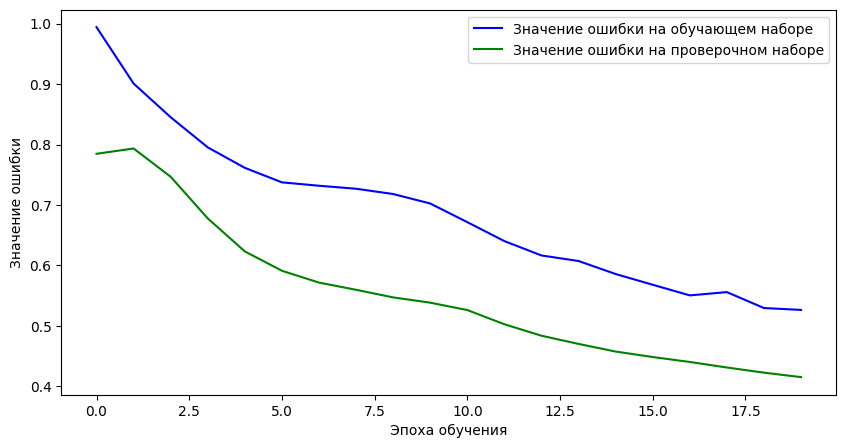

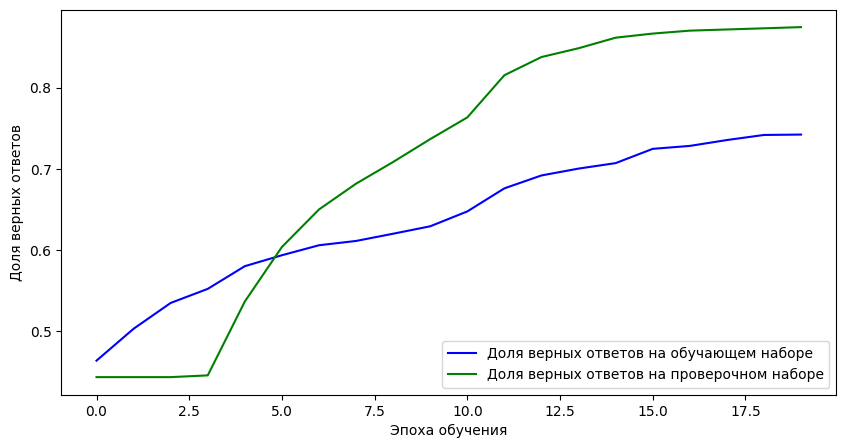

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(history1.history['loss']+history2.history['loss'],
         label='Значение ошибки на обучающем наборе',color='b')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],
         label='Значение ошибки на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
#plt.style.use('ggplot')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения метрика "accuracy"
plt.figure(figsize = (10, 5))
plt.plot(history1.history['accuracy']+history2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе',color='b')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе',color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Компиляция и дообучение
from tensorflow.keras.saving import load_model
model4 = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import F1Score
model4.compile(optimizer=Adam(learning_rate=0.00001),
               loss='binary_crossentropy',
               metrics=[F1Score(),'accuracy'])
history3 = model4.fit({'input_x1':txt_bow_train,'input_x2':OHE_data_train,'input_x3':x_data_train,'input_x4':txt_seq_1k_train}, targetall_train,
                      batch_size=48,
                      validation_data=({'input_x1':txt_bow_val,'input_x2':OHE_data_val,'input_x3':x_data_val,'input_x4':txt_seq_1k_val}, targetall_val),
                      epochs=10,
                      verbose=1,
                      callbacks=mycolback4,
                      shuffle=True)

Epoch 1/10
87/87 [==============================] - ETA: 0s - loss: 0.5170 - f1_score: 0.6139 - accuracy: 0.7623
Epoch 1: val_accuracy improved from -inf to 0.87437, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 46s 262ms/step - loss: 0.5170 - f1_score: 0.6139 - accuracy: 0.7623 - val_loss: 0.4091 - val_f1_score: 0.6143 - val_accuracy: 0.8744
Epoch 2/10
87/87 [==============================] - ETA: 0s - loss: 0.5046 - f1_score: 0.6139 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.87437 to 0.87653, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5
87/87 [==============================] - 46s 529ms/step - loss: 0.5046 - f1_score: 0.6139 - accuracy: 0.7500 - val_loss: 0.4005 - val_f1_score: 0.6143 - val_accuracy: 0.8765
Epoch 3/10
87/87 [==============================] - ETA: 0s - loss: 0.4978 - f1_score: 0.6139 - accuracy: 0.7608
Epoch 3: val_accuracy improved from 0.87653 to 0.87798, saving model to /content/drive/MyDrive/media108.ru/Модели/model9_4_1.h5
87/87 [==============================] - 57s 659ms/step - loss: 0.4978 - f1_score: 0.6139 - accuracy: 0.7608 - val_loss: 0.3928 - val_f1_score: 0.6143 - val_accuracy: 0.8

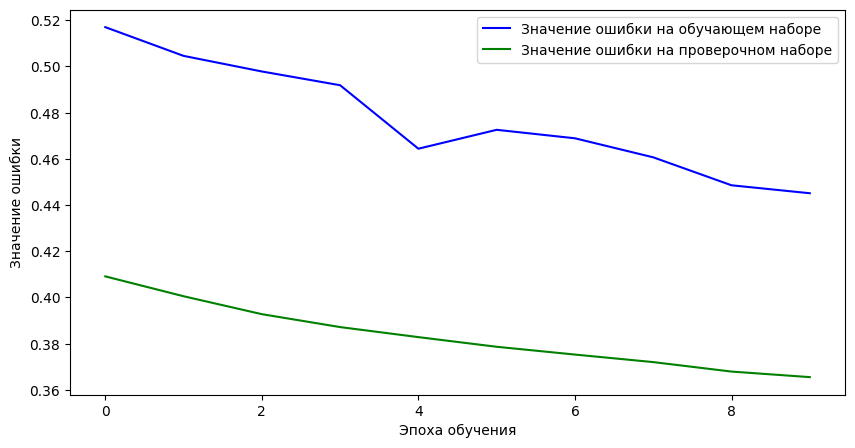

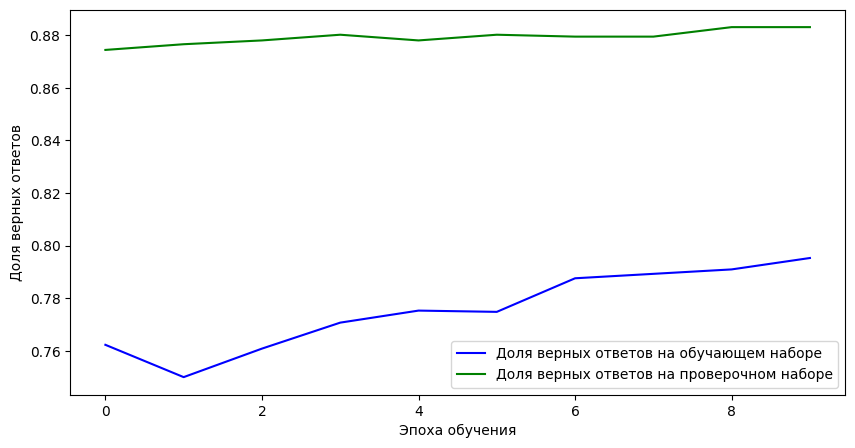

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(history3.history['loss'], label='Значение ошибки на обучающем наборе', color='b')
plt.plot(history3.history['val_loss'], label='Значение ошибки на проверочном наборе', color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(history3.history['accuracy'], label='Доля верных ответов на обучающем наборе', color='b')
plt.plot(history3.history['val_accuracy'], label='Доля верных ответов на проверочном наборе', color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend(loc='lower right')
plt.show()

##### Тест

In [ ]:
# Предсказание для тестовой выборки
y_pred = model4.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test,'input_x4':txt_seq_1k_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 1s 1s/step


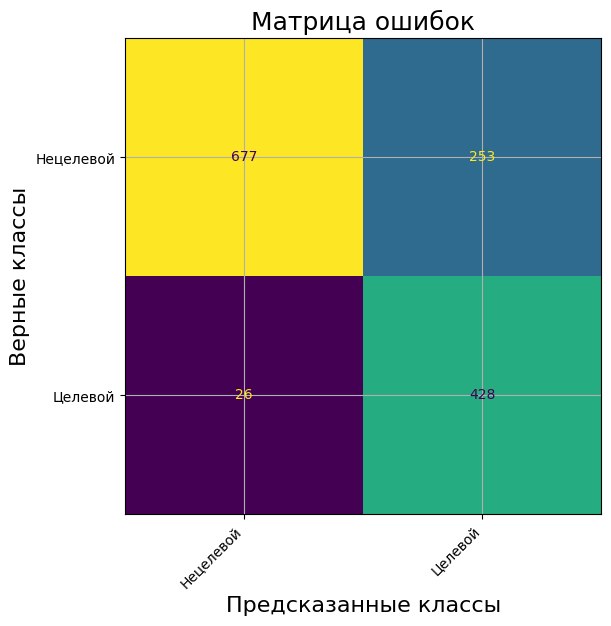

In [ ]:
# Построение матрицы ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,
                      np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       930
         1.0       0.63      0.94      0.75       454

    accuracy                           0.80      1384
   macro avg       0.80      0.84      0.79      1384
weighted avg       0.85      0.80      0.80      1384



## Демонстрация работы моделей

### `model9_2`

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка предобработанных данных
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/model9_2_x_y_array.pkl', 'rb') as f:
  txt_bow, txt_seq, txt_seq_1k, OHE_data, x_data, target, targetall, klass = pkl.load(f)

In [ ]:
# Получение тестовой выборки
from sklearn.model_selection import train_test_split

txt_bow_1,    txt_bow_val,    \
txt_seq_1,    txt_seq_val,    \
txt_seq_1k_1, txt_seq_1k_val, \
OHE_data_1,   OHE_data_val,   \
x_data_1,     x_data_val,     \
target_1,     target_val,     \
targetall_1,  targetall_val,  \
klass_1,      klass_val       \
 = train_test_split(txt_bow,
                    txt_seq,
                    txt_seq_1k,
                    OHE_data,
                    x_data,
                    target,
                    targetall,
                    klass,
                    test_size=0.2,
                    random_state=42,
                    stratify=klass)

txt_bow_train, txt_bow_test,       \
txt_seq_train, txt_seq_test,       \
txt_seq_1k_train, txt_seq_1k_test, \
OHE_data_train, OHE_data_test,     \
x_data_train, x_data_test,         \
target_train, target_test,         \
targetall_train, targetall_test,   \
klass_train, klass_test            \
 = train_test_split(txt_bow_1,
                    txt_seq_1,
                    txt_seq_1k_1,
                    OHE_data_1,
                    x_data_1,
                    target_1,
                    targetall_1,
                    klass_1,
                    test_size=0.25,
                    random_state=42,
                    stratify=klass_1)

In [ ]:
# Загрузка модели нейронной сети
from tensorflow.keras.saving import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/model9_2.h5')

In [ ]:
# Предсказание для тестовой выборки
y_pred = model.predict({'input_x1':txt_bow_test,'input_x2':OHE_data_test,'input_x3':x_data_test}, batch_size=txt_bow_test.shape[0])

1/1 [==============================] - 1s 1s/step


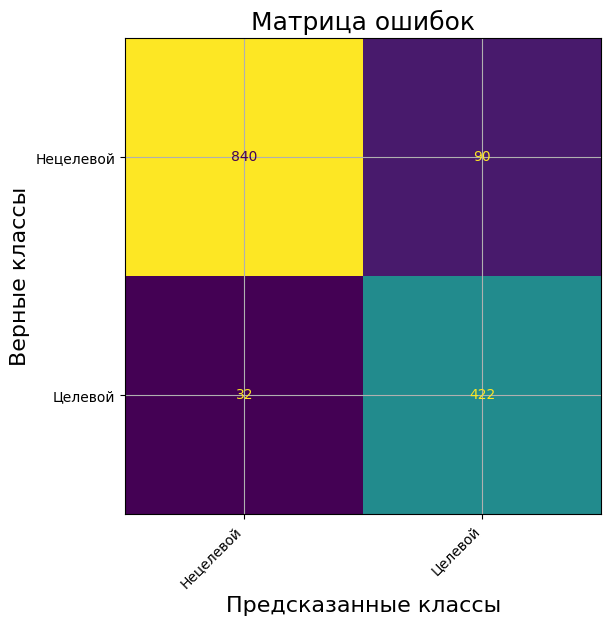

In [ ]:
# Матрица ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, np.rint(y_pred))
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(target_test, np.rint(y_pred)))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       930
         1.0       0.82      0.93      0.87       454

    accuracy                           0.91      1384
   macro avg       0.89      0.92      0.90      1384
weighted avg       0.92      0.91      0.91      1384



In [ ]:
# Датафрейм с результатами тестирования модели
import pandas as pd
df = pd.DataFrame({'Верные классы': target_test, 'Предсказанные классы': np.rint(y_pred).reshape(1, -1)[0]})
df.shape

(1384, 2)

In [ ]:
# Количество правильных предсказаний
df[df['Верные классы'] == df['Предсказанные классы']].shape[0]

1262

In [ ]:
# Количество неправильных предсказаний
df[df['Верные классы'] != df['Предсказанные классы']].shape[0]

122

In [ ]:
# Процент
print(f"{df[df['Верные классы'] == df['Предсказанные классы']].shape[0]/df.shape[0]:.2%}")

91.18%


### `bert`

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка transformers
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.8 MB/s eta 0:00:00


In [ ]:
# Модель

from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

import torch.nn as nn
class BERT_Arch(nn.Module):
  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)
  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

import torch
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

(…)-cased-sentence/resolve/main/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

<All keys matched successfully>

In [ ]:
# Получение тестовой выборки

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/media108.ru/Датафреймы/df_good_pred.csv')
df = df[['whisper','target']]

from sklearn.model_selection import train_test_split
tr_df, val_df     = train_test_split(df,    test_size=0.2,  random_state=42, stratify=df['target'])
train_df, test_df = train_test_split(tr_df, test_size=0.25, random_state=42, stratify=tr_df['target'])

from transformers import BertTokenizer
tokenizer   = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')
test_text   = test_df['whisper'].astype('str')
tokens_test = tokenizer.batch_encode_plus(test_text.values,
                                          max_length=512,
                                          padding='max_length',
                                          truncation=True)
test_seq    = torch.tensor(tokens_test['input_ids'])
test_mask   = torch.tensor(tokens_test['attention_mask'])

(…)tence/resolve/main/tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

(…)se-cased-sentence/resolve/main/vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

(…)nce/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# Из-за нехватки видеопамяти отправляем тестовые данные на распознавание по частям

import numpy as np
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq  = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)

predictions = []

for num, elem in enumerate(list_seq):
  with torch.no_grad():
    preds = model(elem.to(device), list_mask[num].to(device))
    predictions.append(preds.detach().cpu().numpy())

flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['pred_'] = flat_preds

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       930
           1       0.79      0.89      0.84       454

    accuracy                           0.89      1384
   macro avg       0.87      0.89      0.87      1384
weighted avg       0.89      0.89      0.89      1384



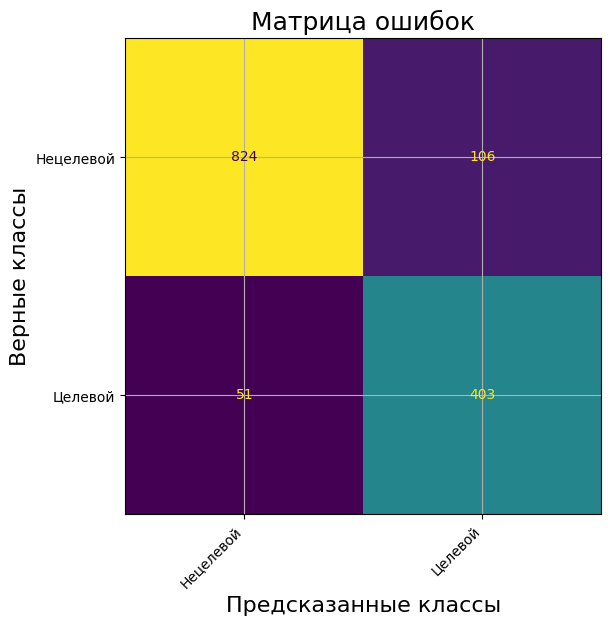

In [ ]:
# Порог 0.95
from sklearn.metrics import classification_report
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.95 else 0)
print(classification_report(test_df['target'], test_df['pred']))

# Матрица ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_df['target'], test_df['pred'])
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# Датафрейм с результатами тестирования модели
import pandas as pd
df = pd.DataFrame({'Верные классы': test_df['target'].values, 'Предсказанные классы': test_df['pred'].values})
df.shape

(1384, 2)

In [ ]:
# Количество правильных предсказаний
df[df['Верные классы'] == df['Предсказанные классы']].shape[0]

1227

In [ ]:
# Количество неправильных предсказаний
df[df['Верные классы'] != df['Предсказанные классы']].shape[0]

157

In [ ]:
# Процент
print(f"{df[df['Верные классы'] == df['Предсказанные классы']].shape[0]/df.shape[0]:.2%}")

88.66%


              precision    recall  f1-score   support

           0       0.97      0.85      0.91       930
           1       0.75      0.94      0.84       454

    accuracy                           0.88      1384
   macro avg       0.86      0.90      0.87      1384
weighted avg       0.90      0.88      0.88      1384



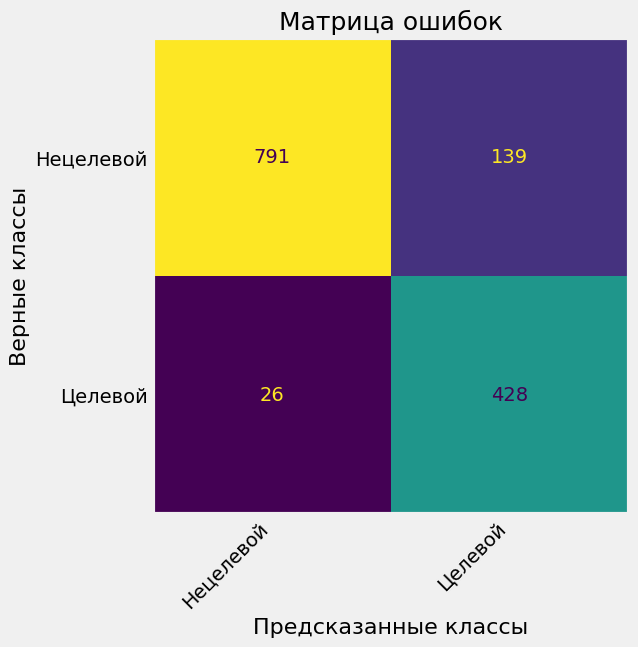

In [ ]:
# Порог 0.93
from sklearn.metrics import classification_report
test_df['pred'] = test_df['pred_'].apply(lambda x: 1 if x > 0.93 else 0)
print(classification_report(test_df['target'], test_df['pred']))

# Матрица ошибок
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_df['target'], test_df['pred'])
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# Датафрейм с результатами тестирования модели
import pandas as pd
df = pd.DataFrame({'Верные классы': test_df['target'].values, 'Предсказанные классы': test_df['pred'].values})
df.shape

(1384, 2)

In [ ]:
# Количество правильных предсказаний
df[df['Верные классы'] == df['Предсказанные классы']].shape[0]

1219

In [ ]:
# Количество неправильных предсказаний
df[df['Верные классы'] != df['Предсказанные классы']].shape[0]

165

In [ ]:
# Процент
print(f"{df[df['Верные классы'] == df['Предсказанные классы']].shape[0]/df.shape[0]:.2%}")

88.08%


## Интеграция в `prod`

### Cохранение и загрузка модели нейронной сети `autokeras`

#### 1

##### Сохранение

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка autokeras
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 131.9 MB/s eta 0:00:00


In [ ]:
# Загрузка модели нейронной сети
import autokeras as ak
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.keras')

Using TensorFlow backend


In [ ]:
# Сохранение модели нейронной сети в tf
model.save('2023.10.15_text_model', save_format='tf')

In [ ]:
# Архивируем папку с сохранённой моделью
!zip -r '/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip' '2023.10.15_text_model'

updating: 2023.10.15_text_model/ (stored 0%)
updating: 2023.10.15_text_model/saved_model.pb (deflated 80%)
updating: 2023.10.15_text_model/keras_metadata.pb (deflated 88%)
updating: 2023.10.15_text_model/variables/ (stored 0%)
updating: 2023.10.15_text_model/variables/variables.index (deflated 62%)
updating: 2023.10.15_text_model/variables/variables.data-00000-of-00001 (deflated 69%)
updating: 2023.10.15_text_model/assets/ (stored 0%)
updating: 2023.10.15_text_model/fingerprint.pb (stored 0%)


##### Загрузка

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Разархивируем модель нейронной сети
!unzip -d ./ '/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip'

Archive:  /content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip
   creating: ./2023.10.15_text_model/
  inflating: ./2023.10.15_text_model/saved_model.pb  
  inflating: ./2023.10.15_text_model/keras_metadata.pb  
   creating: ./2023.10.15_text_model/variables/
  inflating: ./2023.10.15_text_model/variables/variables.index  
  inflating: ./2023.10.15_text_model/variables/variables.data-00000-of-00001  
   creating: ./2023.10.15_text_model/assets/
 extracting: ./2023.10.15_text_model/fingerprint.pb  


In [ ]:
# Загрузка модели нейронной сети
from tensorflow.keras.models import load_model
model = load_model('2023.10.15_text_model')

ValueError: ignored

#### 2

##### Сохранение

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка autokeras
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 123.3 MB/s eta 0:00:00


In [ ]:
# Загрузка модели нейронной сети
import autokeras as ak
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.keras')

Using TensorFlow backend


In [ ]:
ak.CUSTOM_OBJECTS

{'BertPreprocessor': keras_nlp.src.models.bert.bert_preprocessor.BertPreprocessor,
 'BertBackbone': keras_nlp.src.models.bert.bert_backbone.BertBackbone,
 'CastToFloat32': autokeras.keras_layers.CastToFloat32,
 'ExpandLastDim': autokeras.keras_layers.ExpandLastDim,
 'MultiCategoryEncoding': autokeras.keras_layers.MultiCategoryEncoding}

In [ ]:
import keras
with keras.saving.custom_object_scope(ak.CUSTOM_OBJECTS):
    reconstructed_model = load_model('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.keras')

In [ ]:
# Сохранение модели нейронной сети в tf
reconstructed_model.save('2023.10.15_text_model', save_format='tf')

In [ ]:
# Архивируем папку с сохранённой моделью
!zip -r '/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip' '2023.10.15_text_model'

updating: 2023.10.15_text_model/ (stored 0%)
updating: 2023.10.15_text_model/saved_model.pb (deflated 80%)
updating: 2023.10.15_text_model/keras_metadata.pb (deflated 88%)
updating: 2023.10.15_text_model/variables/ (stored 0%)
updating: 2023.10.15_text_model/variables/variables.index (deflated 62%)
updating: 2023.10.15_text_model/variables/variables.data-00000-of-00001 (deflated 69%)
updating: 2023.10.15_text_model/assets/ (stored 0%)
updating: 2023.10.15_text_model/fingerprint.pb (stored 0%)


##### Загрузка

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Разархивируем модель нейронной сети
!unzip -d ./ '/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip'

Archive:  /content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.zip
   creating: ./2023.10.15_text_model/
  inflating: ./2023.10.15_text_model/saved_model.pb  
  inflating: ./2023.10.15_text_model/keras_metadata.pb  
   creating: ./2023.10.15_text_model/variables/
  inflating: ./2023.10.15_text_model/variables/variables.index  
  inflating: ./2023.10.15_text_model/variables/variables.data-00000-of-00001  
   creating: ./2023.10.15_text_model/assets/
 extracting: ./2023.10.15_text_model/fingerprint.pb  


In [ ]:
# Загрузка модели нейронной сети
from tensorflow.keras.models import load_model
model = load_model('2023.10.15_text_model')

ValueError: ignored

#### 3

##### Сохранение

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка autokeras
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 67.9 MB/s eta 0:00:00


In [ ]:
# Загрузка модели нейронной сети
import autokeras as ak
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.keras')

Using TensorFlow backend


In [ ]:
ak.CUSTOM_OBJECTS

{'BertPreprocessor': keras_nlp.src.models.bert.bert_preprocessor.BertPreprocessor,
 'BertBackbone': keras_nlp.src.models.bert.bert_backbone.BertBackbone,
 'CastToFloat32': autokeras.keras_layers.CastToFloat32,
 'ExpandLastDim': autokeras.keras_layers.ExpandLastDim,
 'MultiCategoryEncoding': autokeras.keras_layers.MultiCategoryEncoding}

In [ ]:
import keras
with keras.saving.custom_object_scope(ak.CUSTOM_OBJECTS):
    reconstructed_model = load_model('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.keras')

In [ ]:
# Сохранение модели нейронной сети в tf
reconstructed_model.save('2023.10.15_text_model', save_format='tf')

In [ ]:
model = ak.StructuredDataRegressor(project_name='2023.10.15_text_model',
                                   directory='2023.10.15_text_model')

In [ ]:
#model = ak.StructuredDataRegressor(max_trials=max_trials,
#                                   column_names=data_cols,
#                                   column_types=data_type,
#                                   project_name=model_name,
#                                   directory='data/models_saved_data/')

In [ ]:
# Сохранение модели нейронной сети в pkl
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.pkl', 'wb') as f:
  pkl.dump(model, f)

AttributeError: ignored

##### Загрузка

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка модели нейронной сети
import pickle as pkl
with open('/content/drive/MyDrive/media108.ru/Модели/2023.10.15_text_model.pkl', 'rb') as f:
  model = pkl.load(f)

TypeError: ignored

### API (`whisper`) CPU

#### 1

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка cohere openai tiktoken
!pip -q install cohere openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Установка openai-whisper
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-6mmoa30k
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-6mmoa30k
  Resolved https://github.com/openai/whisper.git to commit 1cea4357687b676b293cb5473e1ade25f5b1cef7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231106-py3-none-any.whl size=801359 sha256=8fc0ae5e118eaa40c2ba075fad306caa2f1457dc2df61d6a721a146b857b8ad7
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ania4cu/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper


In [ ]:
# Установка дополнительных библиотек
!pip -q install fastapi uvicorn python-multipart typing-extensions==4.5.0 kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 993.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Эндпойнт
main_file = '''
from fastapi import FastAPI

import whisper
whisper_model = whisper.load_model('medium')

from pydantic import BaseModel
class Item(BaseModel):
  file: str

app = FastAPI()

@app.post('/predict')
async def predict(item: Item):
  test_sample = whisper_model.transcribe(item.file, language='ru')
  return {'result': test_sample}
'''
with open('main.py', 'w') as f:
  f.write(main_file)

In [ ]:
# Запуск uvicorn
!nohup uvicorn main:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [1363] using StatReload


In [ ]:
# Тестовые данные
import pickle as pkl
import pandas as pd
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)
test_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_targets_test_df['Файл записи звонка'].head(1).values[0]
test_not_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_not_targets_test_df['Файл записи звонка'].head(1).values[0]

In [ ]:
# Целевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_targets_sample_file})
print(response.text)

ConnectionError: ignored

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [1363] using StatReload
100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.0MiB/s]
INFO:     Started server process [1369]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [ ]:
# Целевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_targets_sample_file})
print(response.text)

{"result":{"text":" Вы позвонили в группу компании Cartros. Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании Cartros. Лилия. Здравствуйте. Хедлайнер, да, Жика? Я бы хотела узнать. А у вас есть возможность показать готовые квартиры? Или у вас еще все на уровне только застройки? Нет, у нас есть уже в данной корпус. Давайте я вас соединю с менеджером отдела продаж. Там шоу-рум есть, где посмотреть. Отлично. Хорошо, давайте, подскажите. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Одну минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта Headliner. Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис подаж, шмидтерский проезд, 39, корпус водя. А вы можете мне геолокацию скинуть на вактаб? Я сейчас уже буду выезжать. И там где какая парковка? На улице? Я могу вам направить карту подъезда комплексу. Вы на автомобиле едете? Да, да. Вы м

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [1363] using StatReload
100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.0MiB/s]
INFO:     Started server process [1369]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:55430 - "POST /predict HTTP/1.1" 200 OK


In [ ]:
# Нецелевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_not_targets_sample_file})
print(response.text)

{"result":{"text":" Здравствуйте, вы позвонили в группу компании «Картросс». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картросс». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, который у меня присоединился, но не могу дозвонить, у него абонент недоступен. А что за менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Хорошо, соединяю вас с Татьяна с отделом продаж. Сейчас любой свободный менеджер произнесть ситуацию. Оставайтесь на линии. Благодарю. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Здравствуйте, Антон. Высказала клиента. Клиент уникальный. Хочу удачить им по квартире. У нас бюджет 20 миллионов. Плюс-минус 2 миллиона. Готовая квартира. Но можно пойти и потехать. Уже в готовом построенном доме? Да. Такое возможно? Нужно защитить отдела ипотеки. У вас по готовым домам можно пойти и потехать или нет? У нас осталась одна ква

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [1363] using StatReload
100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.0MiB/s]
INFO:     Started server process [1369]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:55430 - "POST /predict HTTP/1.1" 200 OK
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:47516 - "POST /predict HTTP/1.1" 200 OK


#### 2

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка cohere openai tiktoken
!pip -q install cohere openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00


In [ ]:
# Установка openai-whisper
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-pinp1ovv
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-pinp1ovv
  Resolved https://github.com/openai/whisper.git to commit 1cea4357687b676b293cb5473e1ade25f5b1cef7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231106-py3-none-any.whl size=801359 sha256=e604fb0a4d520f978d374b61250ecd285099c4ef3d46846ab70de95090f4c425
  Stored in directory: /tmp/pip-ephem-wheel-cache-n2kf0pxe/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper


In [ ]:
# Установка дополнительных библиотек
!pip -q install fastapi uvicorn python-multipart typing-extensions==4.5.0 kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
# Эндпойнт
main_file = '''
from fastapi import FastAPI
from pydantic import BaseModel
import whisper

class Item(BaseModel):
  file: str

app = FastAPI()

@app.post('/predict')
async def predict(item: Item):
  whisper_model = whisper.load_model('medium')
  test_sample = whisper_model.transcribe(item.file, language='ru')
  return {'result': test_sample}
'''
with open('main.py', 'w') as f:
  f.write(main_file)

In [ ]:
# Запуск uvicorn
!nohup uvicorn main:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2139] using StatReload
INFO:     Started server process [2145]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [ ]:
# Тестовые данные
import pickle as pkl
import pandas as pd
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)
test_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_targets_test_df['Файл записи звонка'].head(1).values[0]
test_not_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_not_targets_test_df['Файл записи звонка'].head(1).values[0]

In [ ]:
# Целевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_targets_sample_file})
print(response.text)

{"result":{"text":" Вы позвонили в группу компании Cartros. Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании Cartros. Лилия. Здравствуйте. Хедлайнер, да, Жика? Я бы хотела узнать. А у вас есть возможность показать готовые квартиры? Или у вас еще все на уровне только застройки? Нет, у нас есть уже в данной корпус. Давайте я вас соединю с менеджером отдела продаж. Там шоу-рум есть, где посмотреть. Отлично. Хорошо, давайте, подскажите. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Одну минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта Headliner. Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис подаж, шмидтерский проезд, 39, корпус водя. А вы можете мне геолокацию скинуть на вактаб? Я сейчас уже буду выезжать. И там где какая парковка? На улице? Я могу вам направить карту подъезда комплексу. Вы на автомобиле едете? Да, да. Вы м

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2139] using StatReload
INFO:     Started server process [2145]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
100%|█████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 96.4MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:34284 - "POST /predict HTTP/1.1" 200 OK


In [ ]:
# Нецелевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_not_targets_sample_file})
print(response.text)

{"result":{"text":" Здравствуйте, вы позвонили в группу компании «Картросс». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картросс». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, который у меня присоединился, но не могу дозвонить, у него абонент недоступен. А что за менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Хорошо, соединяю вас с Татьяна с отделом продаж. Сейчас любой свободный менеджер произнесть ситуацию. Оставайтесь на линии. Благодарю. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Здравствуйте, Антон. Высказала клиента. Клиент уникальный. Хочу удачить им по квартире. У нас бюджет 20 миллионов. Плюс-минус 2 миллиона. Готовая квартира. Но можно пойти и потехать. Уже в готовом построенном доме? Да. Такое возможно? Нужно защитить отдела ипотеки. У вас по готовым домам можно пойти и потехать или нет? У нас осталась одна ква

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2139] using StatReload
INFO:     Started server process [2145]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
100%|█████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 96.4MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:34284 - "POST /predict HTTP/1.1" 200 OK
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
INFO:     127.0.0.1:49520 - "POST /predict HTTP/1.1" 200 OK


### API (`whisper`) GPU

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Установка cohere openai tiktoken
!pip -q install cohere openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Установка openai-whisper
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-nd4oun4l
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-nd4oun4l
  Resolved https://github.com/openai/whisper.git to commit 1cea4357687b676b293cb5473e1ade25f5b1cef7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231106-py3-none-any.whl size=801359 sha256=bcba21c7dbed4acfab94900440cb1660f66ad2c9dc63c5e66b2ee9e20c904d2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wsq1isfl/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper


In [ ]:
# Установка дополнительных библиотек
!pip -q install fastapi uvicorn python-multipart typing-extensions==4.5.0 kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.5 MB/s eta 0:00:00


In [ ]:
# Эндпойнт
main_file = '''
from fastapi import FastAPI
from pydantic import BaseModel
import whisper

class Item(BaseModel):
  file: str

app = FastAPI()

@app.post('/predict')
async def predict(item: Item):
  whisper_model = whisper.load_model('large')
  test_sample = whisper_model.transcribe(item.file, language='ru')
  return {'result': test_sample}
'''
with open('main.py', 'w') as f:
  f.write(main_file)

In [ ]:
# Запуск uvicorn
!nohup uvicorn main:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2691] using StatReload


In [ ]:
# Тестовые данные
import pickle as pkl
import pandas as pd
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)
with open('/content/drive/MyDrive/media108.ru/Датафреймы/total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)
test_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_targets_test_df['Файл записи звонка'].head(1).values[0]
test_not_targets_sample_file = '/content/drive/MyDrive/media108.ru/Датасет/' + total_not_targets_test_df['Файл записи звонка'].head(1).values[0]

In [ ]:
# Целевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_targets_sample_file})
print(response.text)

{"result":{"text":" Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос» Лилия. Здравствуйте. Хедлайнер ЖК. Я бы хотела узнать, у вас есть возможность показать готовые квартиры? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоу-рум есть, где посмотреть. Отлично. Хорошо, давайте. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Одну минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хедлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж «Шмитовский проезд», 30. А вы можете мне геолокацию скинуть на WhatsApp на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка, там на улице можно встать, правильно? Я могу вам направить карту подъезда к комплексу. Вы 

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2691] using StatReload
INFO:     Started server process [2697]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
100%|█████████████████████████████████████| 2.88G/2.88G [00:31<00:00, 96.7MiB/s]
INFO:     127.0.0.1:59468 - "POST /predict HTTP/1.1" 200 OK


In [ ]:
# Нецелевой звонок
import requests
response = requests.post('http://127.0.0.1:8000/predict', json={'file': test_not_targets_sample_file})
print(response.text)

{"result":{"text":" Здравствуйте! Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Иван Дадаев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Добрый день. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Антон. Уникального клиента. Клиент уникальный. Хочу вам сказать, что я очень рада, что вы пришли к нам. Хочу уточнить по квартире. У нас бюджет 2 миллиона. Ну, плюс-минус 2 миллиона, да? Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно уточнить у отдела ипотеки, по готовым домам возможн

In [ ]:
# Лог
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2691] using StatReload
INFO:     Started server process [2697]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
100%|█████████████████████████████████████| 2.88G/2.88G [00:31<00:00, 96.7MiB/s]
INFO:     127.0.0.1:59468 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:45276 - "POST /predict HTTP/1.1" 200 OK
